<a href="https://colab.research.google.com/github/reinanbr/colab_notebooks/blob/main/ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 600,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (6, 4),
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.7,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "mathtext.fontset": "cm",   # usa Computer Modern para equações
    "text.usetex": False        # ou True, se quiser usar LaTeX com instalação adequada
})




## Magnetização pela Lei de Curie

O trabalho de Curie foi fundamental para demonstrar a importância da mecânica estatística na resolução de problemas da física da matéria condensada.  
Essa área de estudos ainda era muito recente em sua época (assim como o estudo do bóson de Higgs é para nós hoje).  
Sua equação de partição leva em conta os dois estados magnéticos possíveis do elétron — o que hoje chamamos de *spin*.  
Esse problema é conhecido como o problema do paramagnetismo e é fundamental para os estudos de materiais que apresentam propriedades como a supercondutividade.

Para podermos trabalhar com ele, precisamos imaginar um material paramagnético contendo uma população de spins.  
Os estados desses spins, como mencionado anteriormente, podem assumir dois valores:  
+μ e -μ, onde μ representa o momento magnético do elétron em relação ao campo magnético externo aplicado.

A energia associada a cada estado depende da orientação do spin em relação ao campo magnético \( B \), sendo dada por:
<br><br>
$$
E = -\mu B \quad \text{(para spin alinhado com o campo)}
$$
$$
E = +\mu B \quad \text{(para spin oposto ao campo)}
$$
<br>

A função partição \( Z \), que é a base da análise estatística, pode então ser escrita como:

$$
Z = e^{\mu B / kT} + e^{-\mu B / kT} = 2 \cosh\left(\frac{\mu B}{kT}\right)
$$

A magnetização média \( M \) é dada por:
$$
M = N \mu \tanh\left(\frac{\mu B}{kT}\right)
$$
onde:
- \( N \) é o número de partículas (ou spins),
- \( k \) é a constante de Boltzmann,
- \( T \) é a temperatura absoluta.

Para temperaturas altas (ou campos magnéticos fracos), podemos usar a aproximação:
$$
\tanh(x) \approx x \quad \text{quando} \quad x \ll 1
$$
e obtemos a **Lei de Curie**:
$$
M \approx N \mu^2 \frac{B}{kT}
$$

Essa expressão mostra que a magnetização de um material paramagnético é diretamente proporcional ao campo aplicado e inversamente proporcional à temperatura — quanto maior a temperatura, menor a magnetização.



In [2]:

# Constantes
mu = 1  # Momento magnético (valor arbitrário)
k = 1   # Constante de Boltzmann (valor arbitrário)
N = 1   # Número de partículas (valor arbitrário)


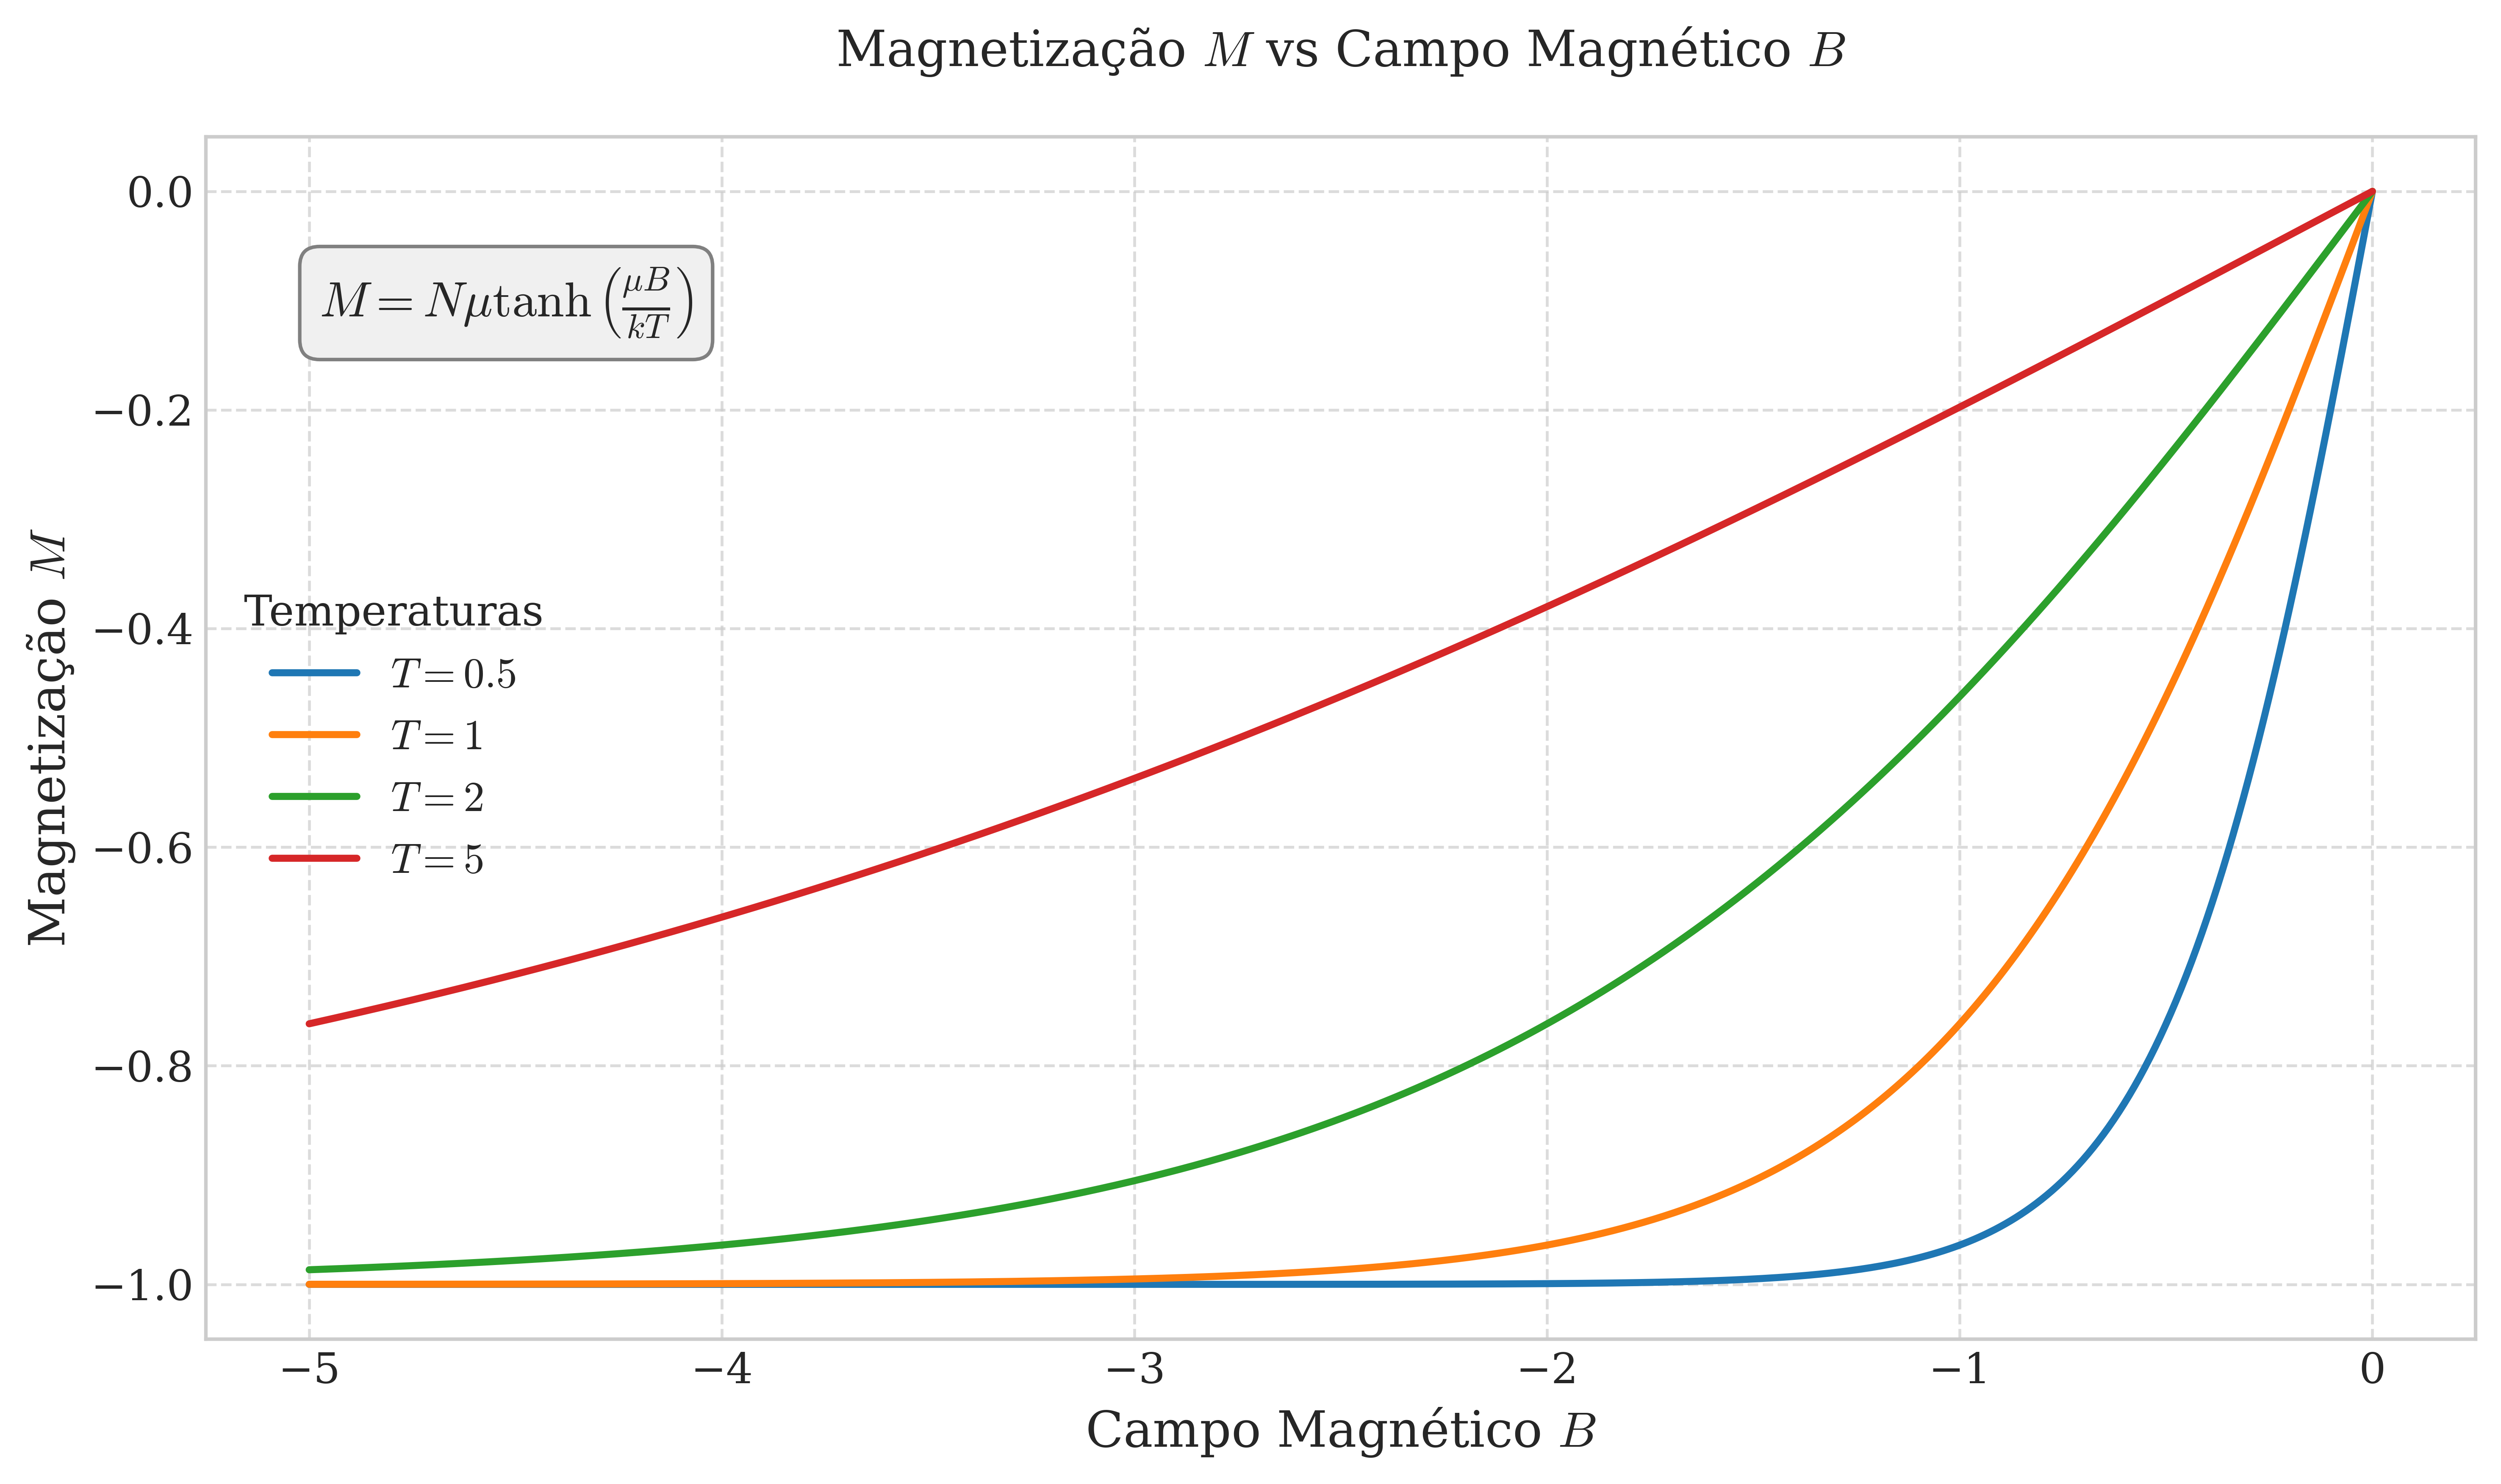

In [ ]:

# Constantes
mu = 1
k = 1
N = 1

# Campo magnético variando
B_vals = np.linspace(-5, 0, 400)
temperaturas = [0.5, 1, 2, 5]

plt.figure(figsize=(10, 6))

for T in temperaturas:
    M = N * mu * np.tanh(mu * B_vals / (k * T))
    plt.plot(B_vals, M, label=f'$T = {T}$')

# Título e eixos
plt.title('Magnetização $M$ vs Campo Magnético $B$', fontsize=14, pad=20)
plt.xlabel('Campo Magnético $B$')
plt.ylabel('Magnetização $M$')

# Anotação com a equação
plt.text(0.05, 0.85,
         r"$M = N\mu \tanh\left(\frac{\mu B}{kT}\right)$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.legend(title='Temperaturas')
plt.tight_layout()
plt.show()

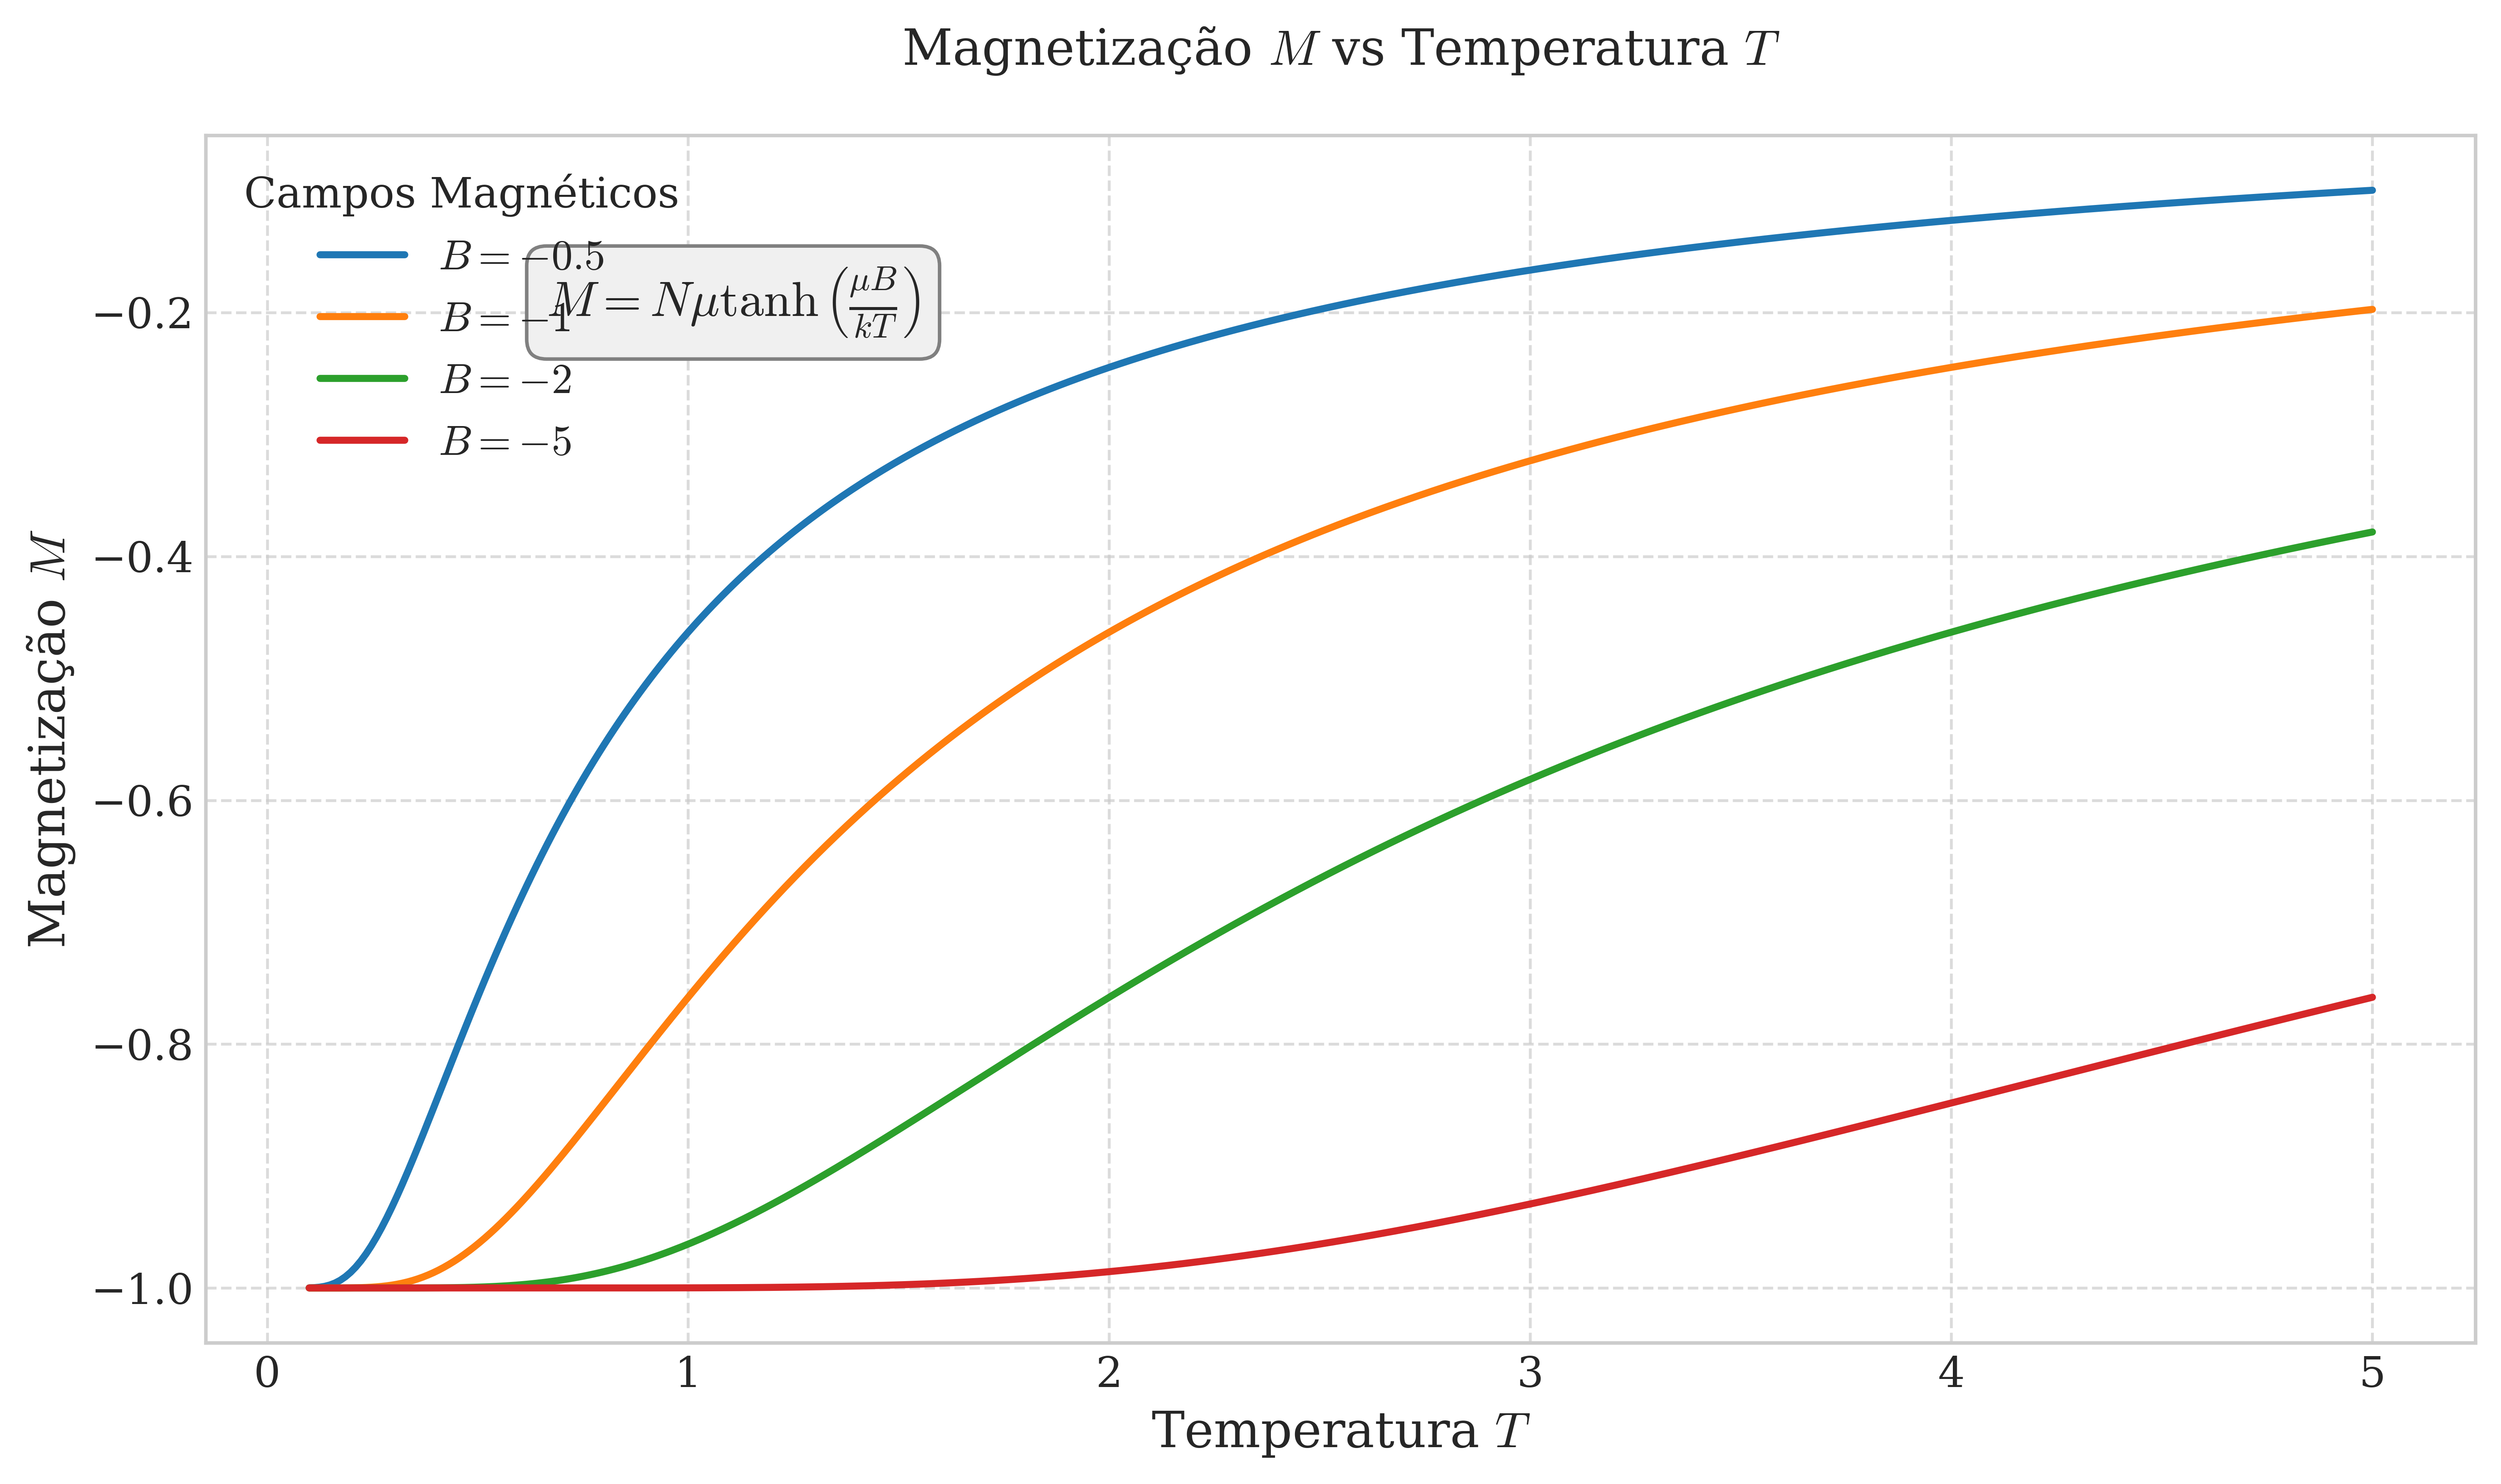

In [ ]:

# Constantes arbitrárias
mu = 1
k = 1
N = 1

# Temperatura variando
T_vals = np.linspace(0.1, 5, 400)
campos = [-0.5, -1, -2, -5]

plt.figure(figsize=(10, 6))

for B in campos:
    M = N * mu * np.tanh(mu * B / (k * T_vals))
    plt.plot(T_vals, M, label=f'$B = {B}$')

# Título e eixos
plt.title('Magnetização $M$ vs Temperatura $T$', fontsize=14, pad=20)
plt.xlabel('Temperatura $T$')
plt.ylabel('Magnetização $M$')

# Anotação com a equação
plt.text(0.15, 0.85,
         r"$M = N\mu \tanh\left(\frac{\mu B}{kT}\right)$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.legend(title='Campos Magnéticos')
plt.tight_layout()
plt.show()

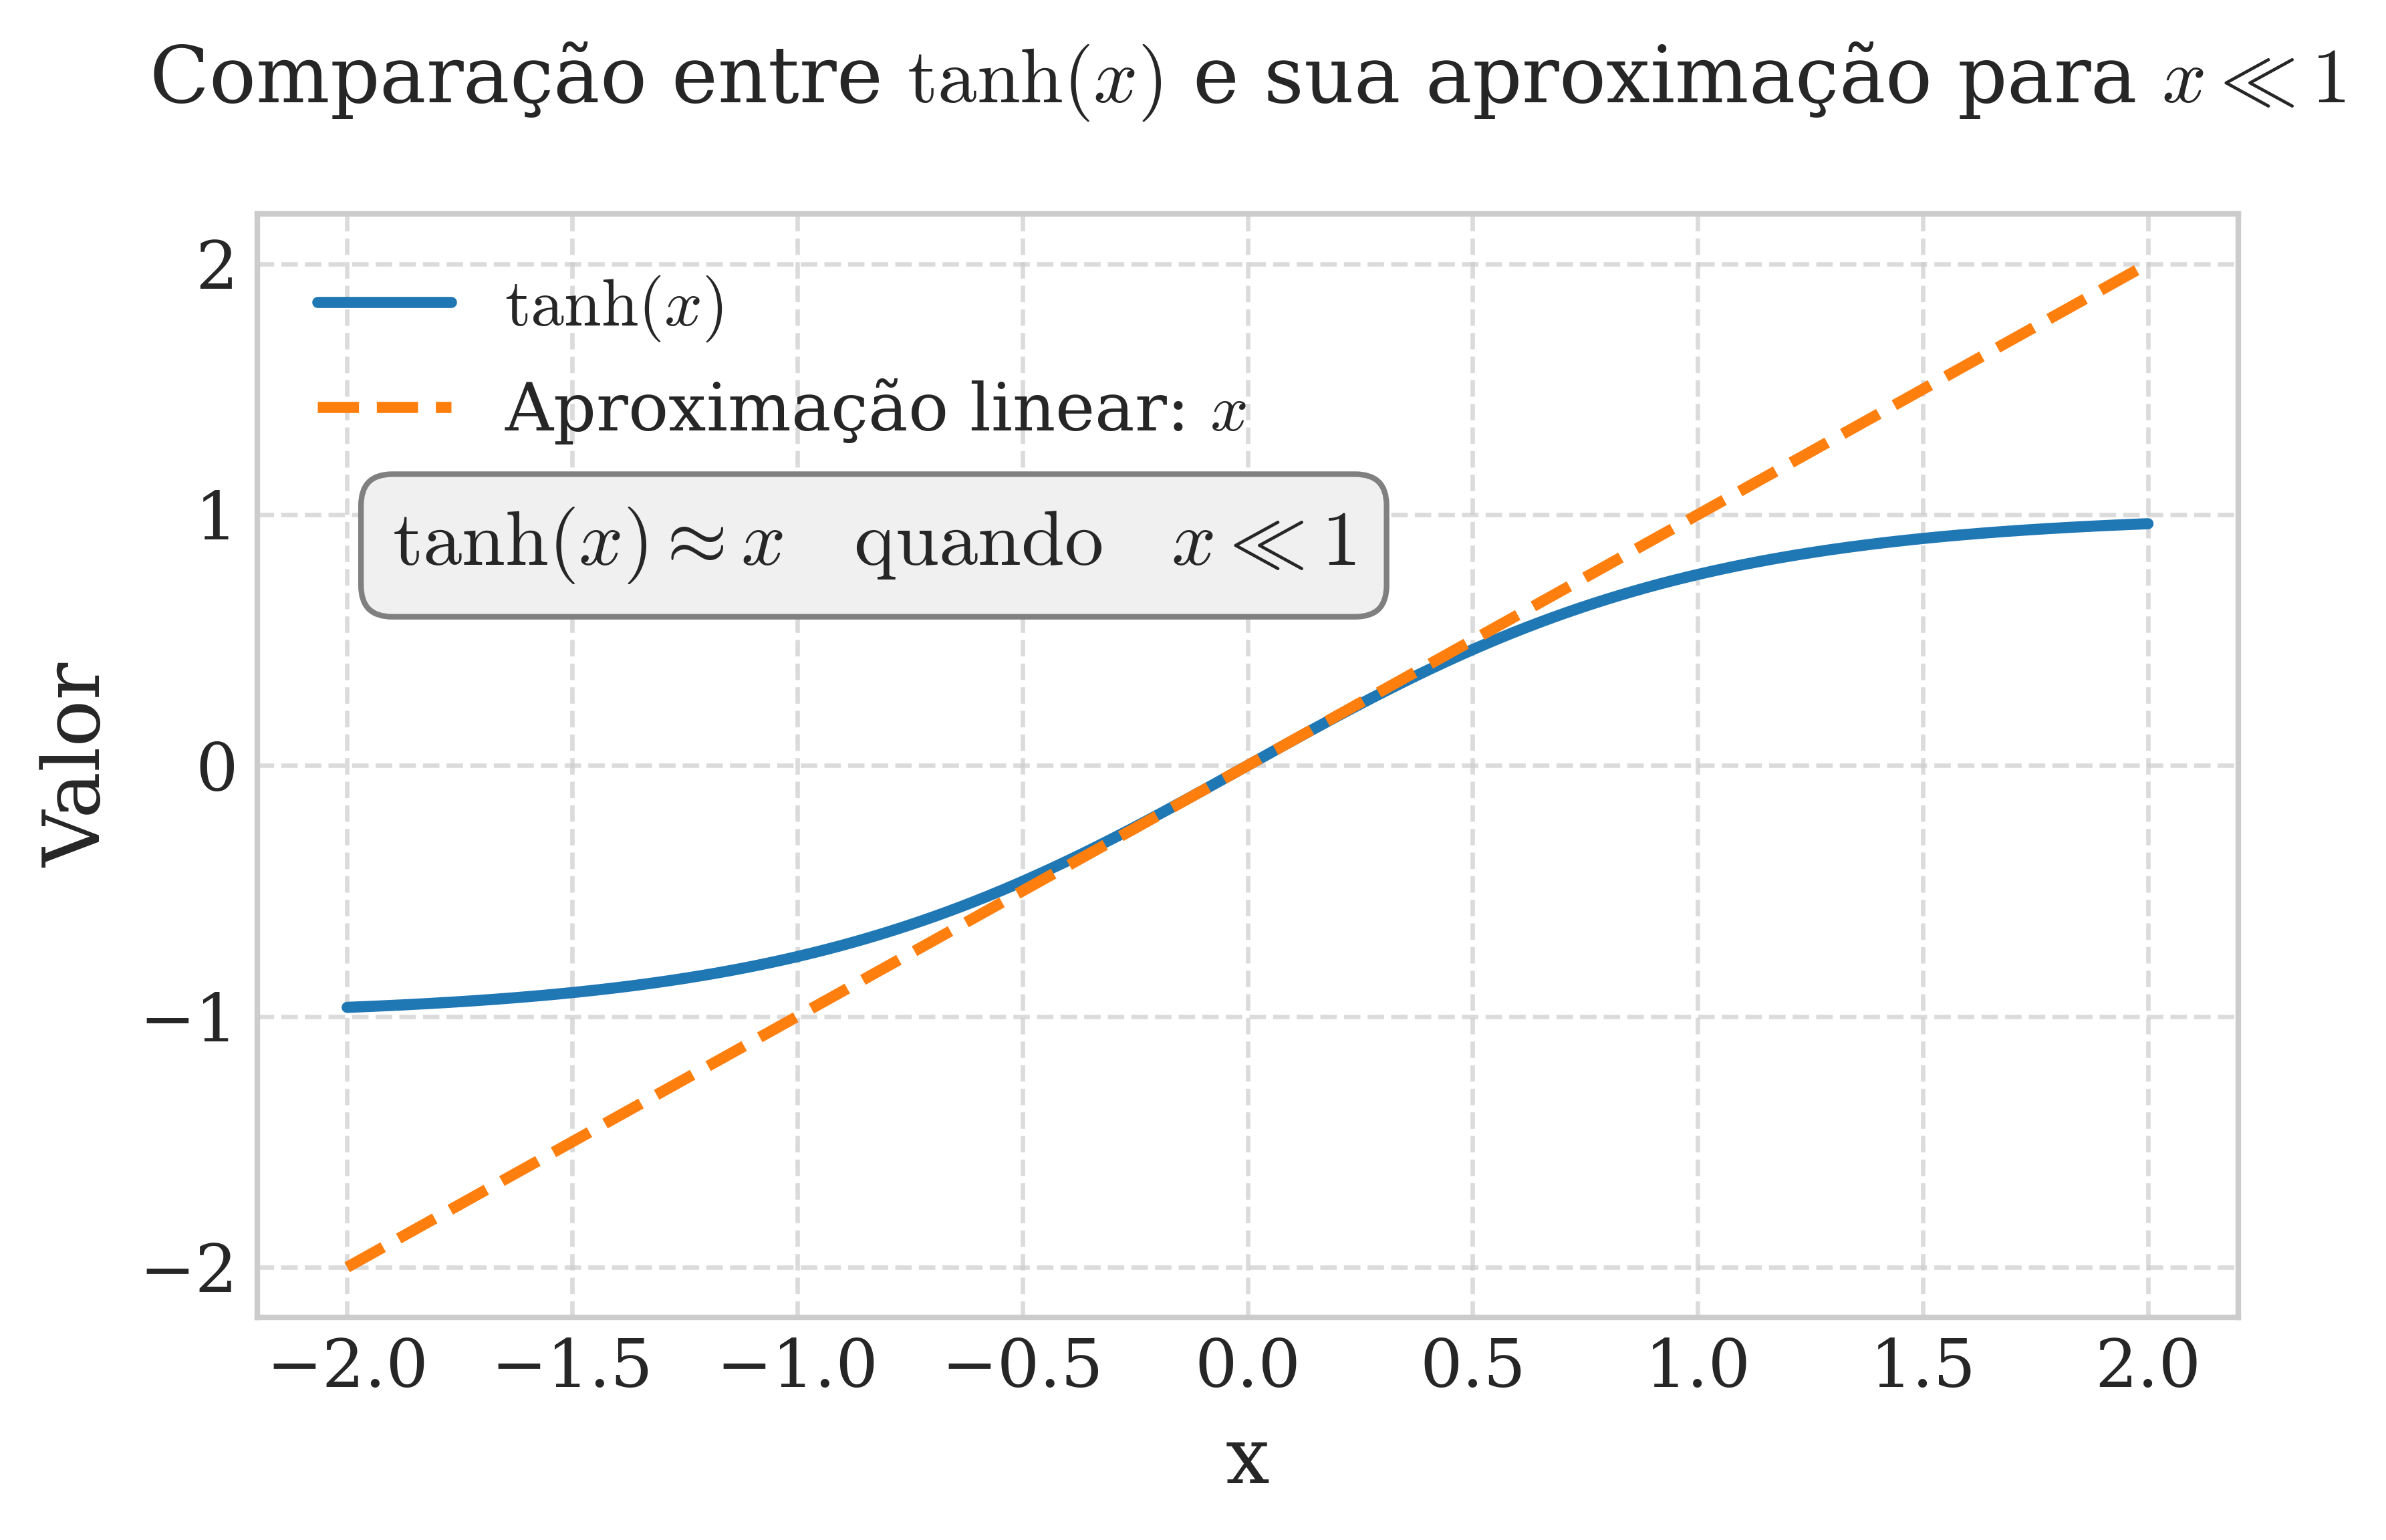

In [ ]:
x_vals = np.linspace(-2, 2, 400)

plt.plot(x_vals, np.tanh(x_vals), label=r'$\tanh(x)$', linewidth=2)
plt.plot(x_vals, x_vals, label='Aproximação linear: $x$', linestyle='--')

# Título e eixos
plt.title('Comparação entre $\\tanh(x)$ e sua aproximação para $x \\ll 1$', fontsize=14, pad=20)
plt.xlabel('x')
plt.ylabel('Valor')

# Anotação com a equação
plt.text(-1.9, 0.8,
         r"$\tanh(x) \approx x \quad \text{quando} \quad x \ll 1$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



No modelo clássico (modelo de **Langevin**), o momento magnético de uma partícula em um campo magnético \( B \) tende a se alinhar com o campo, mas a agitação térmica (energia térmica \( kT \)) age contra esse alinhamento.

A magnetização média é dada por:

$$
M = N \mu \mathcal{L}(\alpha), \quad \text{onde} \quad \alpha = \frac{\mu B}{kT}
$$

com:

$$
\mathcal{L}(\alpha) = \coth(\alpha) - \frac{1}{\alpha}
$$

é a **função de Langevin**.

A suscetibilidade magnética clássica é então:

$$
\chi = \left.\frac{dM}{dB}\right|_{B \to 0} = \frac{N \mu^2}{3kT}
$$


Essa é **a mesma expressão da Lei de Curie**! Só que aqui, ela vem **do modelo contínuo** da orientação dos dipolos magnéticos — nada de spin.

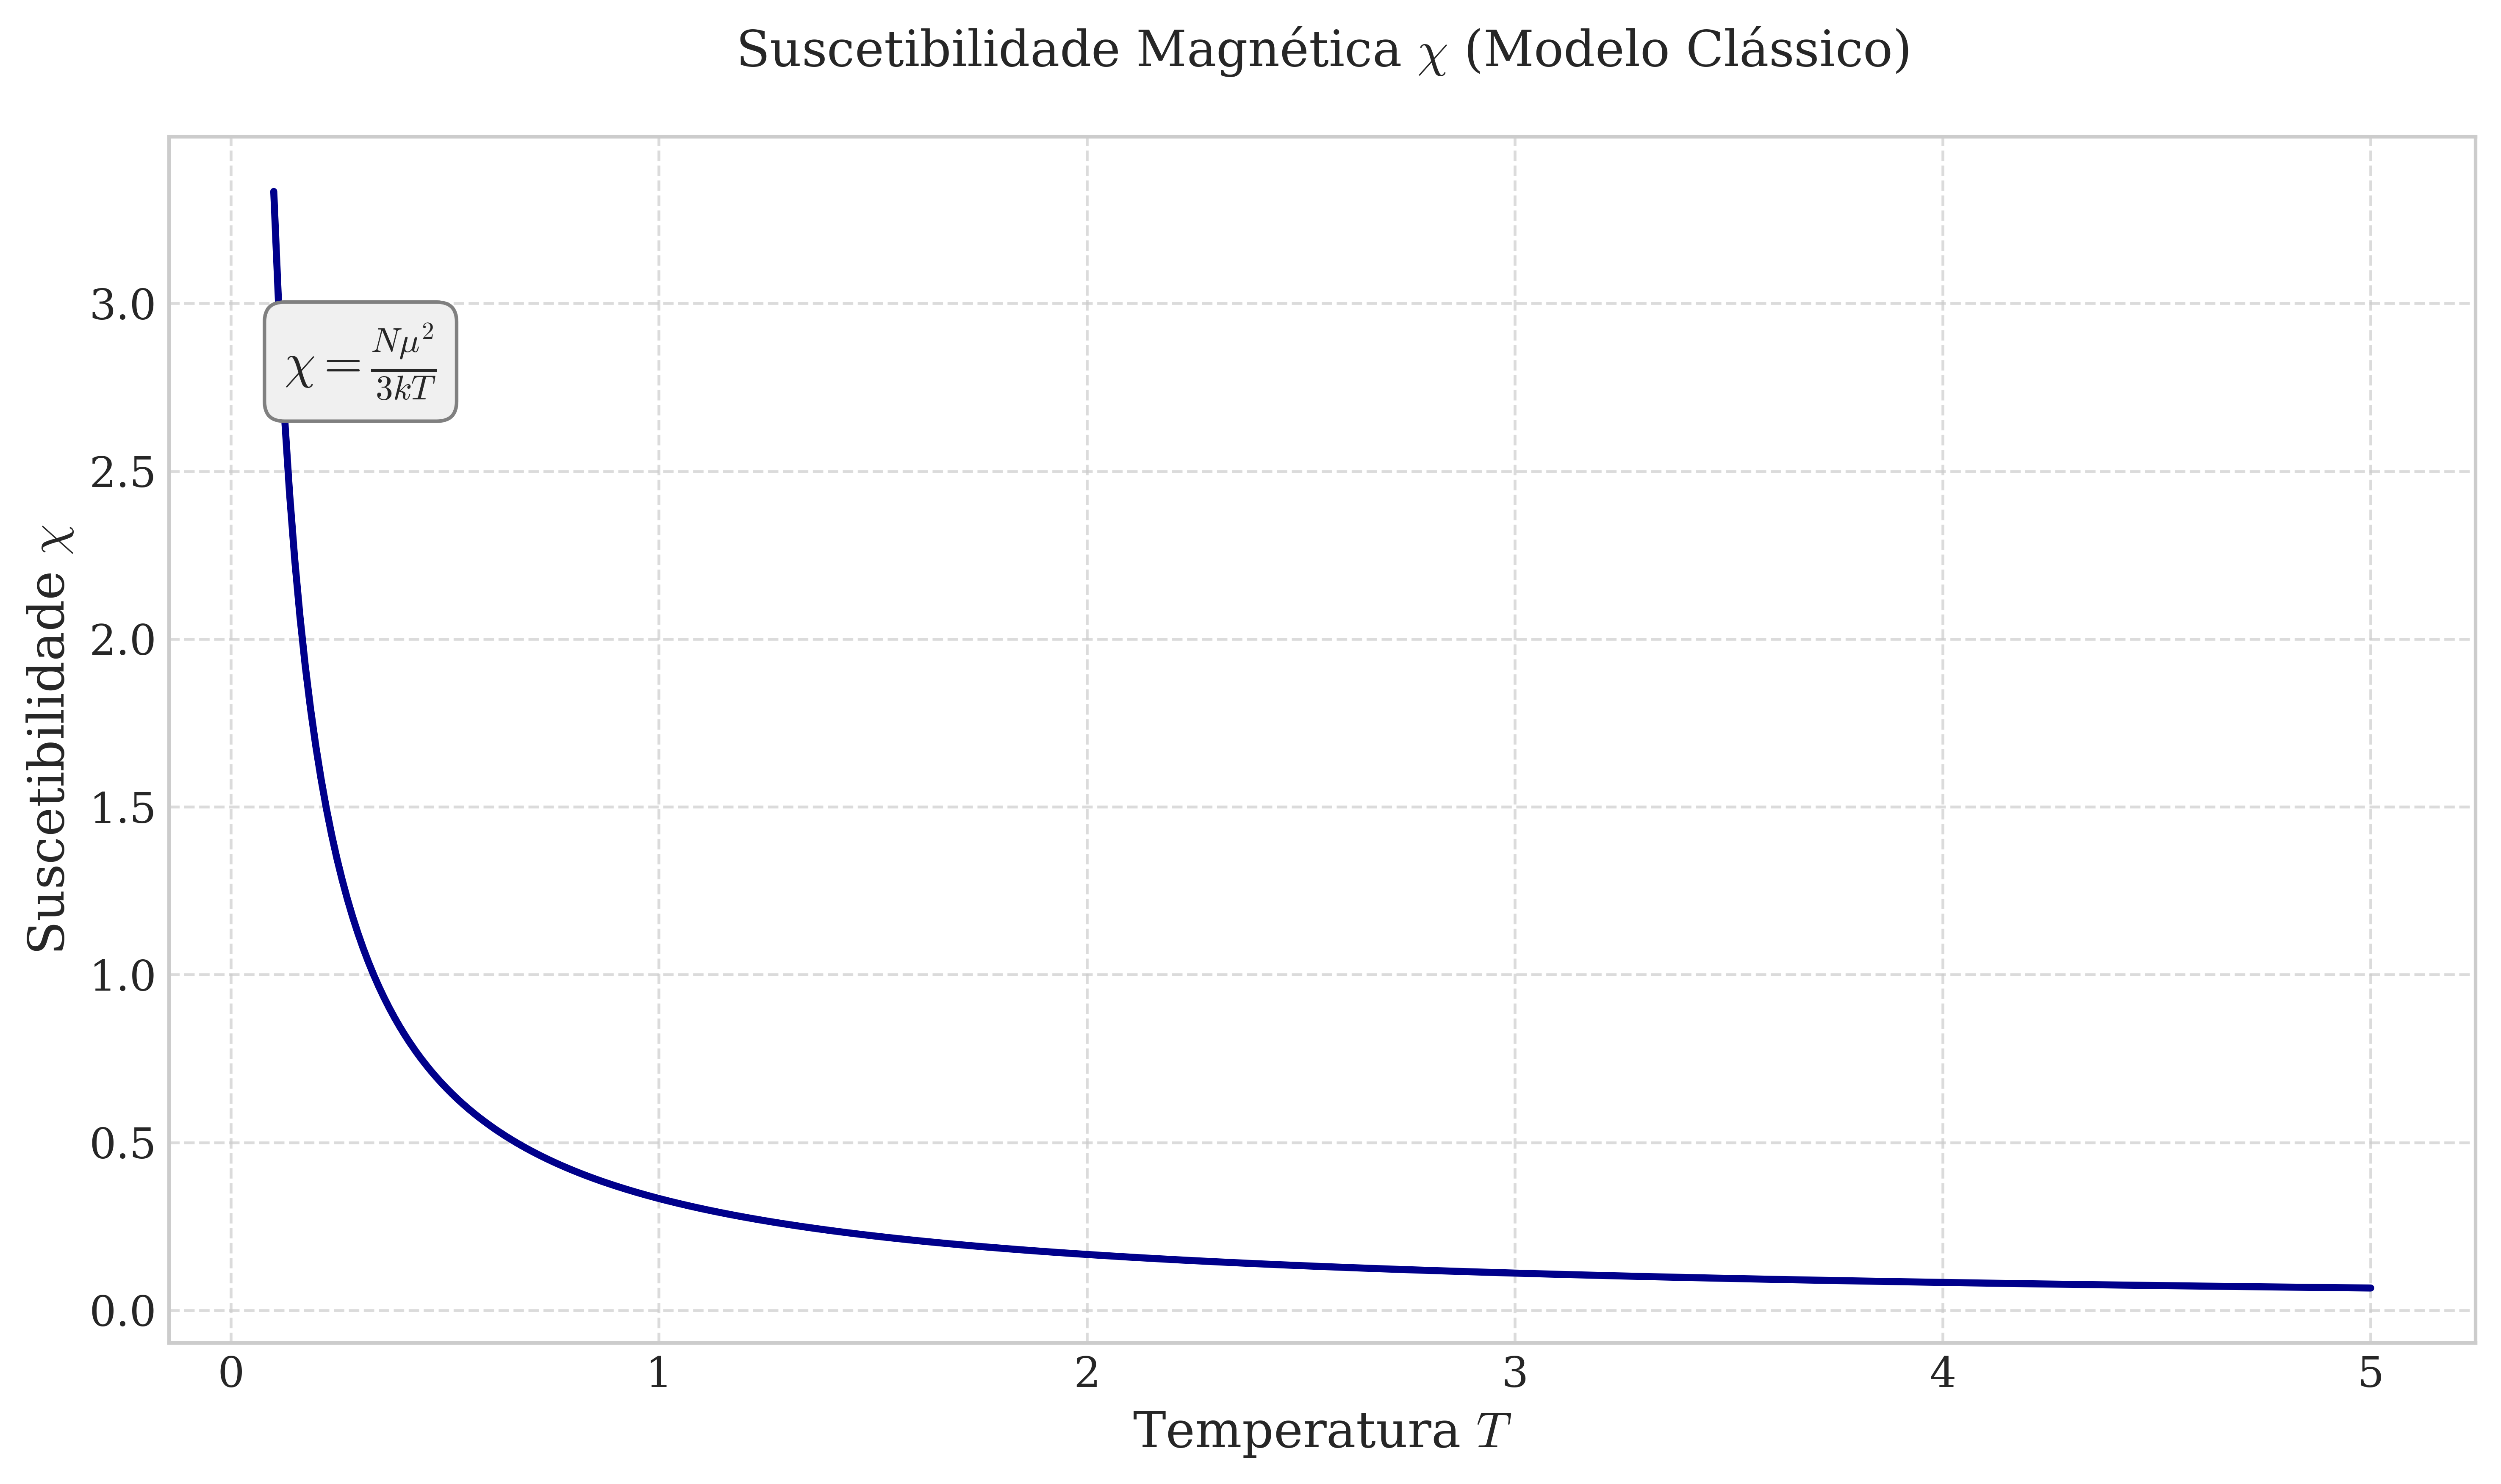

In [ ]:
# Constantes clássicas arbitrárias
mu = -1     # momento magnético
k = 1      # constante de Boltzmann
N = 1      # número de partículas

# Temperatura variando
T_vals = np.linspace(0.1, 5, 400)

# Suscetibilidade clássica (modelo de Langevin no limite B → 0)
chi = N * mu**2 / (3 * k * T_vals)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(T_vals, chi, color='darkblue', linewidth=2)
plt.title('Suscetibilidade Magnética $\\chi$ (Modelo Clássico)', fontsize=14, pad=20)
plt.xlabel('Temperatura $T$')
plt.ylabel('Suscetibilidade $\\chi$')

# Anotação da fórmula clássica
plt.text(0.05, 0.8,
         r"$\chi = \frac{N \mu^2}{3kT}$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.tight_layout()






- \( M \) é a **magnetização total** do sistema clássico:  
  $$
  M = N \mu \mathcal{L}(\alpha), \quad \alpha = \frac{\mu B}{kT}
  $$

- \( M_z \) é a **componente da magnetização ao longo da direção do campo magnético** (que nesse modelo é o próprio \( M \), pois todos os momentos se orientam com o campo em equilíbrio).  
  Ou seja, **no modelo clássico isotrópico**, \( M = M_z \), então:

$$
\frac{M_z}{M} = 1
$$

Mas se você estiver comparando o valor médio de um componente ao longo de todas as direções (como no espaço 3D), aí sim temos um contexto interessante:  
Podemos querer ver como o **alinhamento médio ao longo do campo** varia em relação ao módulo do vetor magnético total.

---

### Se estivermos no modelo de Langevin 3D:

A projeção média ao longo de \( z \) é dada por:

$$
\langle \cos\theta \rangle = \mathcal{L}(\alpha) = \coth(\alpha) - \frac{1}{\alpha}
$$

Então \( M_z = M = N \mu \mathcal{L}(\alpha) \), e o módulo médio dos vetores magnéticos individuais em 3D é:

$$
\langle |\vec{\mu}| \rangle = \mu
$$

Logo a razão entre projeção e módulo (alinhamento médio) é:

$$
\frac{M_z}{N\mu} = \mathcal{L}(\alpha)
$$

- Para \( \alpha \ll 1 \): \( \mathcal{L}(\alpha) \approx \alpha/3 \), alinhamento fraco (alta T ou campo fraco).
- Para \( \alpha \gg 1 \): \( \mathcal{L}(\alpha) \to 1 \), ou seja, **alinhamento total com o campo**.



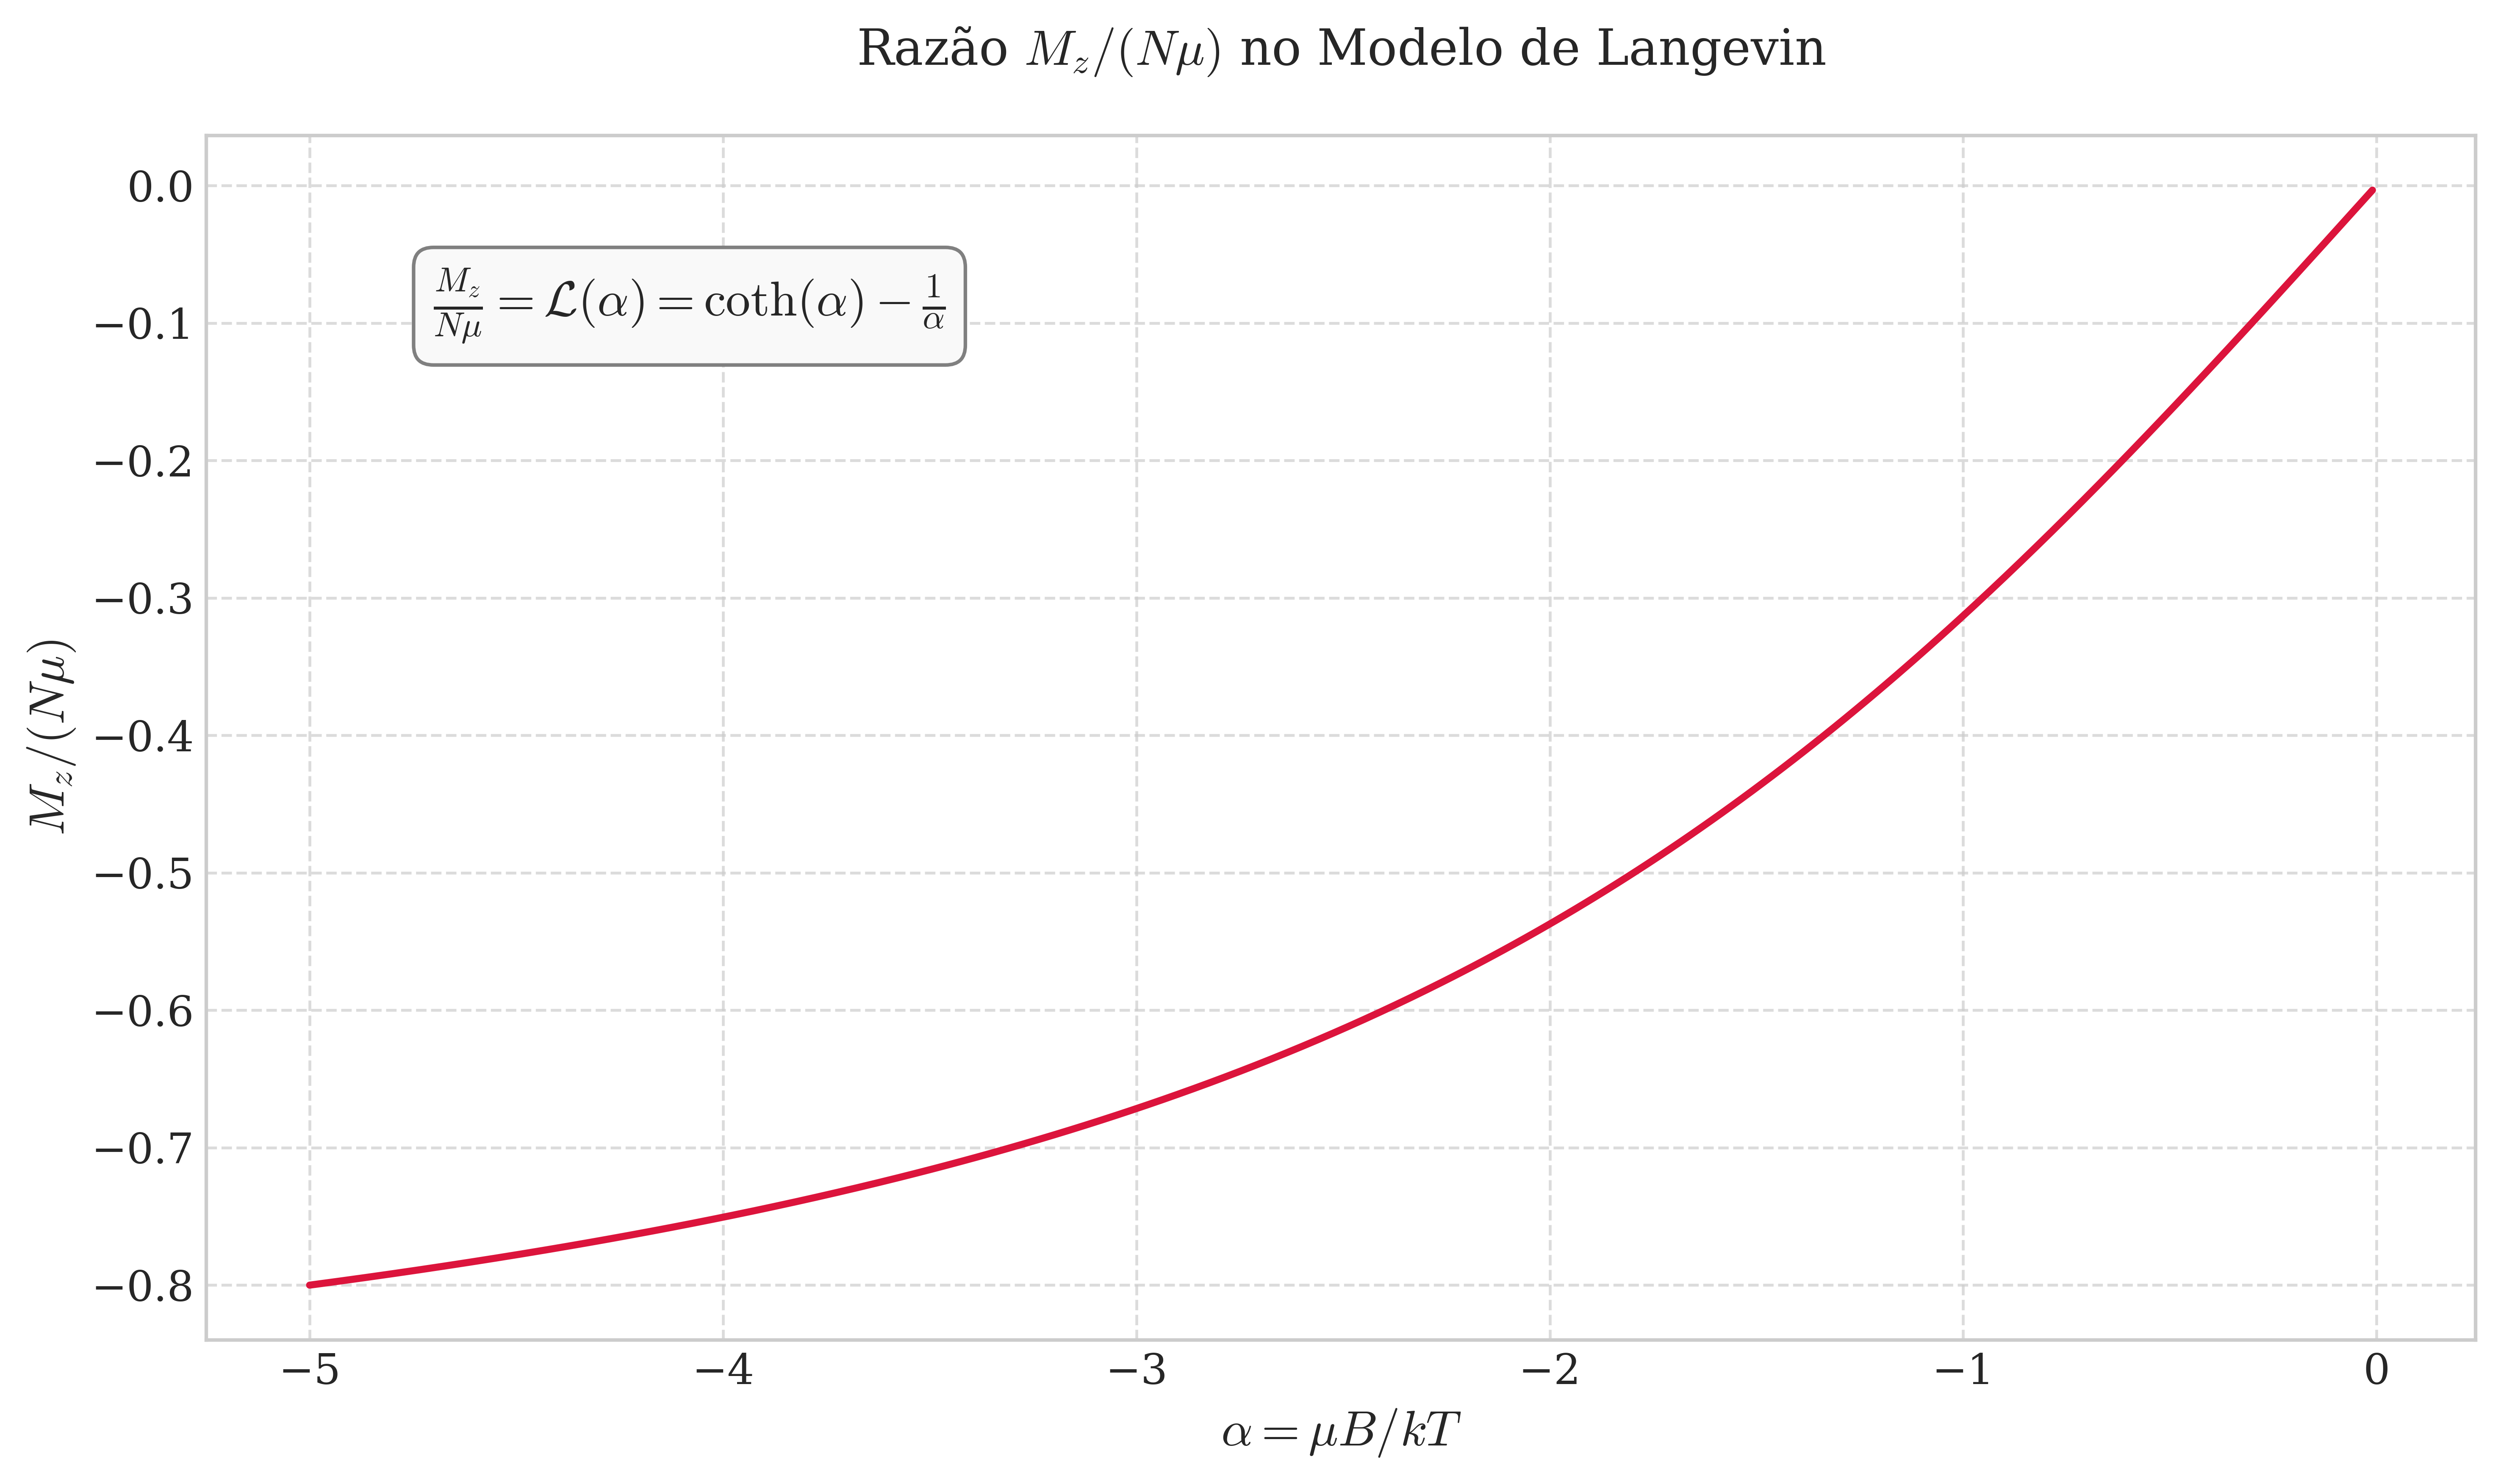

In [ ]:

# Função de Langevin
def langevin(alpha):
    return 1/np.tanh(alpha) - 1/alpha

alpha_vals = np.linspace(-0.01, -5, 400)
L_vals = langevin(alpha_vals)

plt.figure(figsize=(10, 6))
plt.plot(alpha_vals, L_vals, color='crimson', linewidth=2)
plt.title('Razão $M_z / (N \\mu)$ no Modelo de Langevin', fontsize=14, pad=20)
plt.xlabel(r'$\alpha = \mu B / kT$')
plt.ylabel(r'$M_z / (N \mu)$')

# Anotação
plt.text(0.1, 0.85,
         r"$\frac{M_z}{N \mu} = \mathcal{L}(\alpha) = \coth(\alpha) - \frac{1}{\alpha}$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f9f9f9", edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.tight_layout()
plt.show()

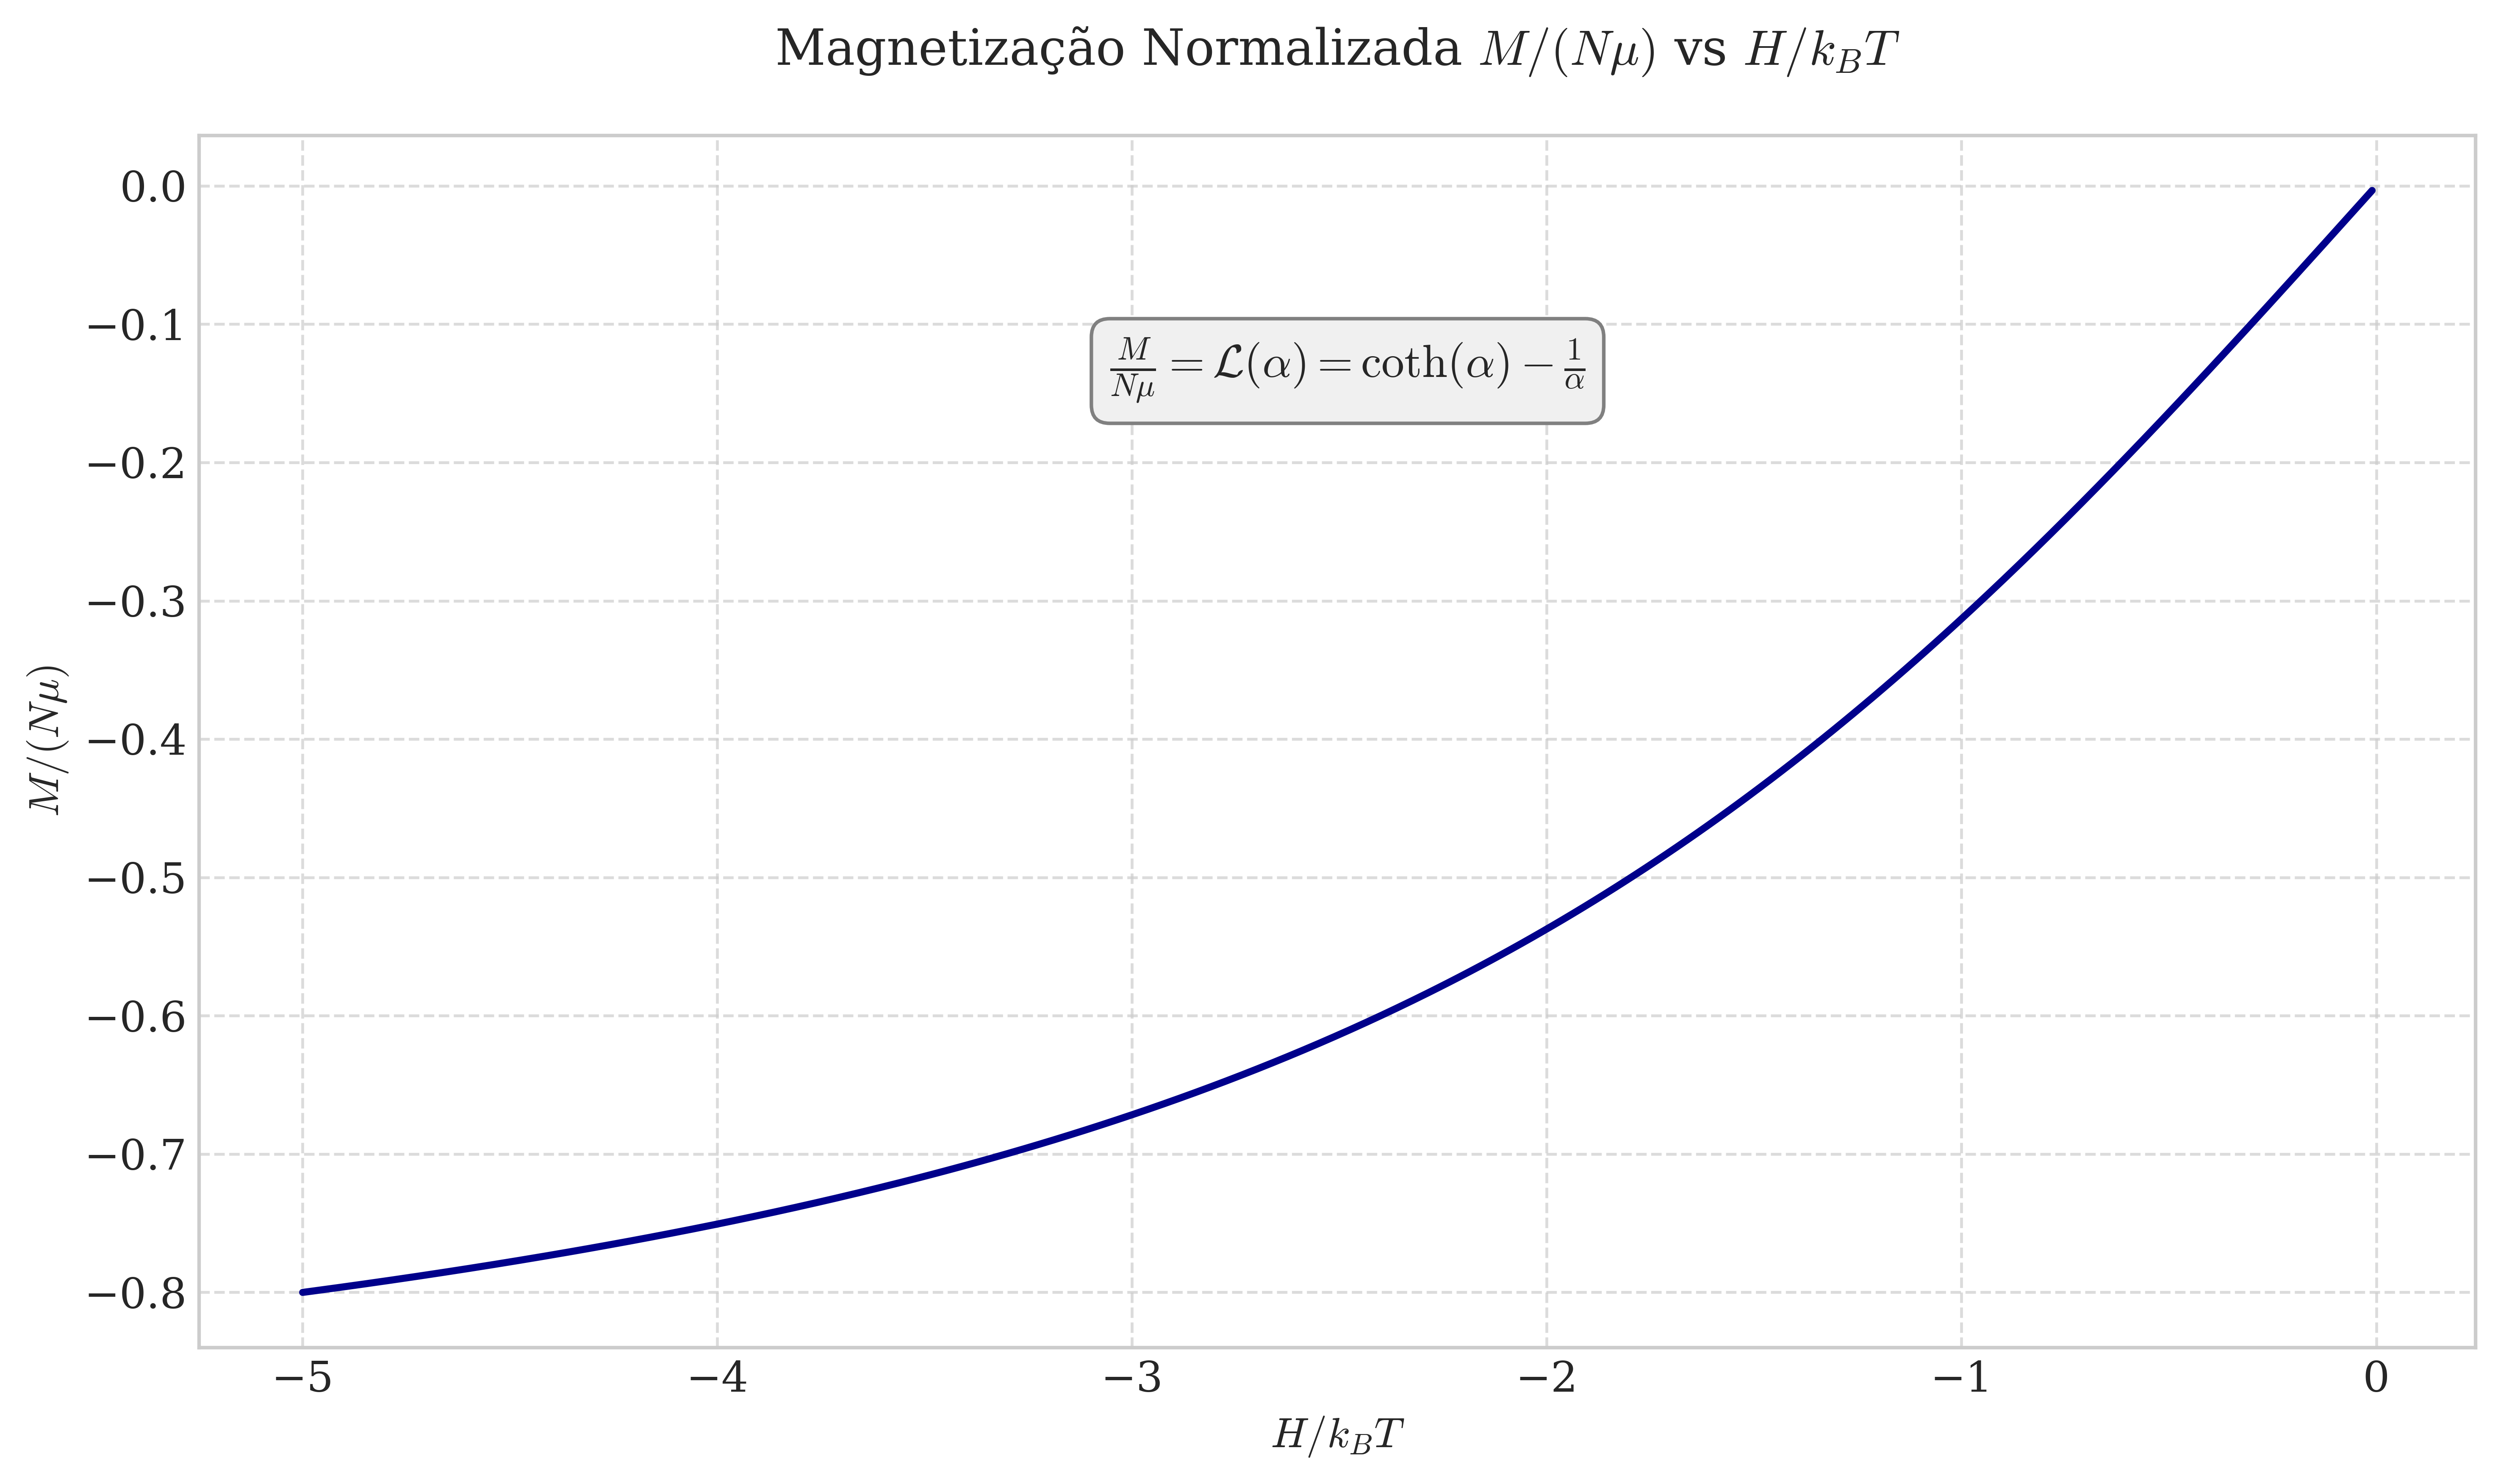

In [ ]:
# Eixo x como H / kT (assumindo mu = 1 para simplificar a visualização)
alpha_vals = np.linspace(-0.01, -5, 400)
M_vals = langevin(alpha_vals)

plt.figure(figsize=(10, 6))
plt.plot(alpha_vals, M_vals, color='darkblue', linewidth=2)
plt.title('Magnetização Normalizada $M / (N\\mu)$ vs $H / k_B T$', fontsize=14, pad=20)
plt.xlabel(r'$H / k_B T$', fontsize=12)
plt.ylabel(r'$M / (N \mu)$', fontsize=12)
plt.grid(True)

# Anotação da equação
plt.annotate(
    r"$\frac{M}{N \mu} = \mathcal{L}(\alpha) = \coth(\alpha) - \frac{1}{\alpha}$",
    xy=(0.4, 0.8), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

plt.tight_layout()
plt.show()


## Modelo de Ising
A **magnetização reduzida** \( m \), derivada do modelo de **Ising de um sítio** (ou de uma partícula interagente com o meio), e tem essa forma:

$$
m(h, t) = \frac{\sinh(h/t)}{\sqrt{\sinh^2(h/t) + e^{-4/t}}}
$$

Onde:
- $( h = \frac{H}{J} )$ → campo magnético reduzido  
- $( t = \frac{k_B T}{J} )$ → temperatura reduzida  
- A constante \( J \) é a energia de interação (ou acoplamento magnético).



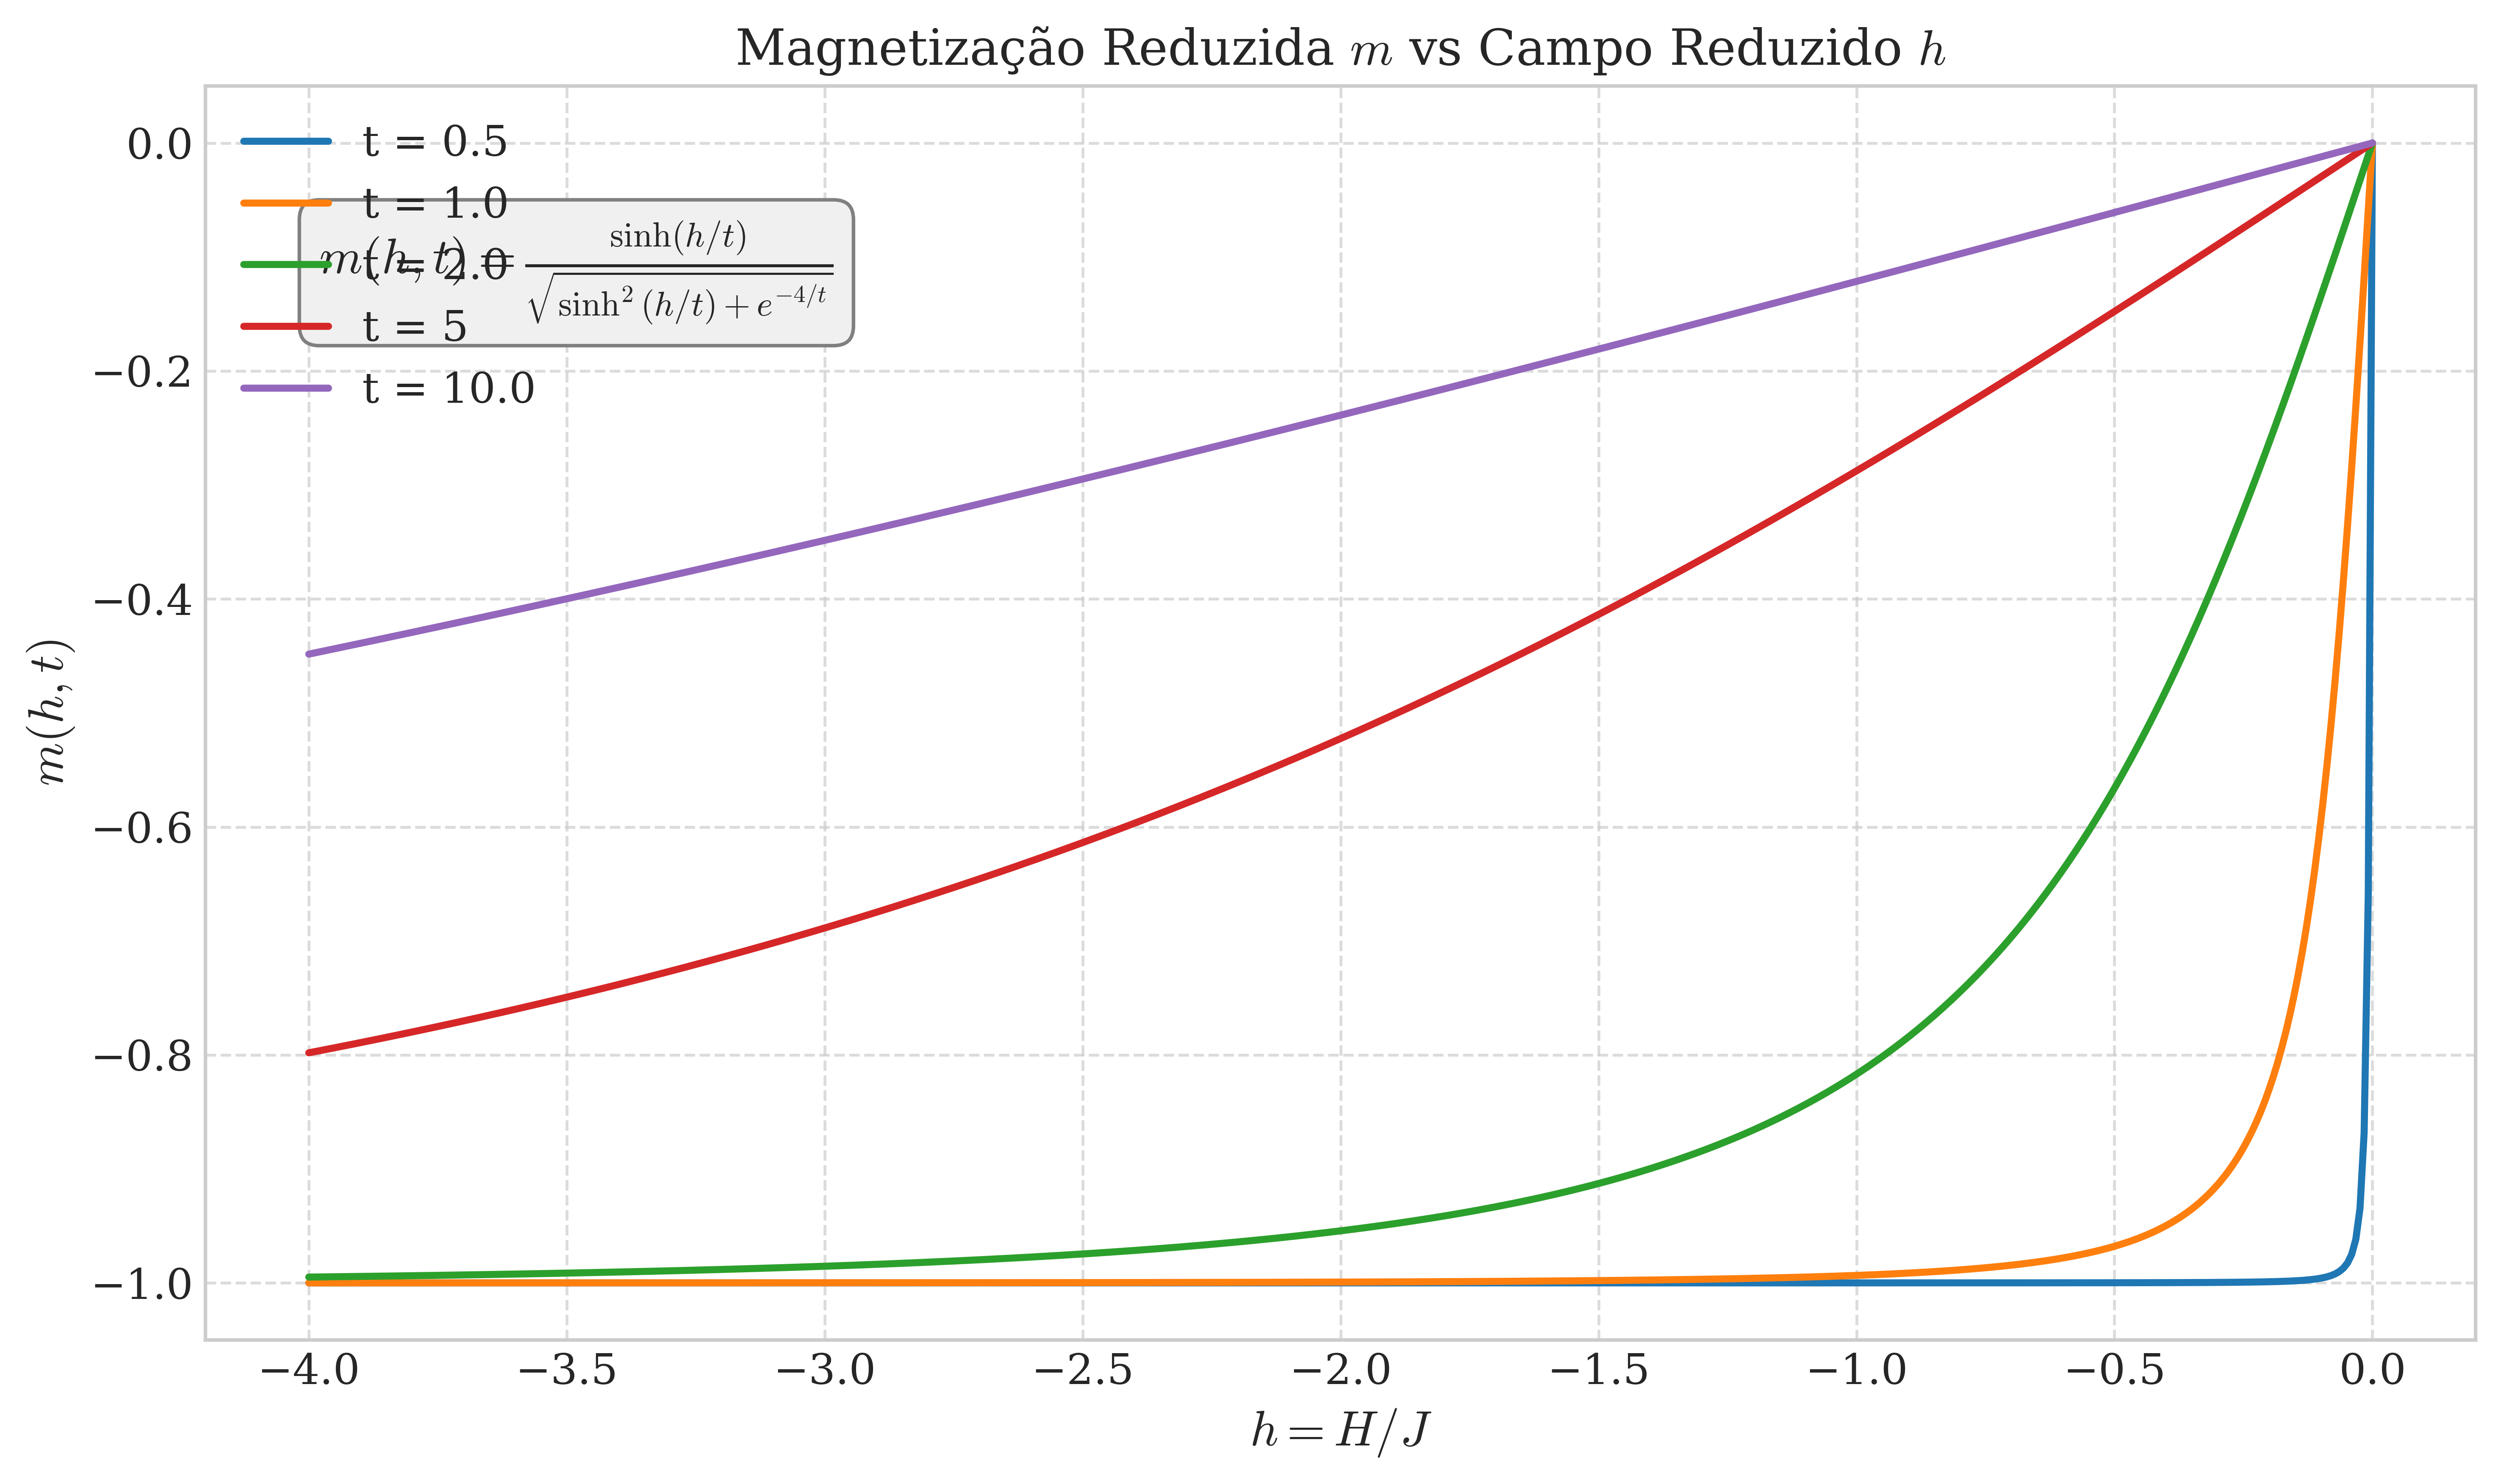

In [ ]:

# Função de magnetização reduzida m(h, t)
def m(h, t):
    num = np.sinh(h / t)
    den = np.sqrt(np.sinh(h / t)**2 + np.exp(-4 / t))
    return num / den

# Vetor de h e temperaturas
h_vals = np.linspace(0, -4, 500)
temperaturas = [0.5, 1.0, 2.0,5, 10.0]

plt.figure(figsize=(10, 6))
for t in temperaturas:
    plt.plot(h_vals, m(h_vals, t), label=f't = {t}')

plt.title('Magnetização Reduzida $m$ vs Campo Reduzido $h$', fontsize=14)
plt.xlabel(r'$h = H/J$')
plt.ylabel(r'$m(h, t)$')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Anotação com a equação
plt.text(0.05, 0.85,
         r"$m(h, t) = \frac{\sinh(h/t)}{\sqrt{\sinh^2(h/t) + e^{-4/t}}}$",
         fontsize=14,
         bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.show()

No modelo de Ising, a magnetização pode ser dada por uma expressão que envolve uma soma sobre os estados possíveis dos spins, levando em consideração o campo magnético aplicado e a temperatura. Para simplificação, vamos usar a aproximação da função hiperbólica cotangente
$(\tanh(\alpha))$ para a magnetização normalizada, como é comum na aproximação de média campo para o modelo de Ising.

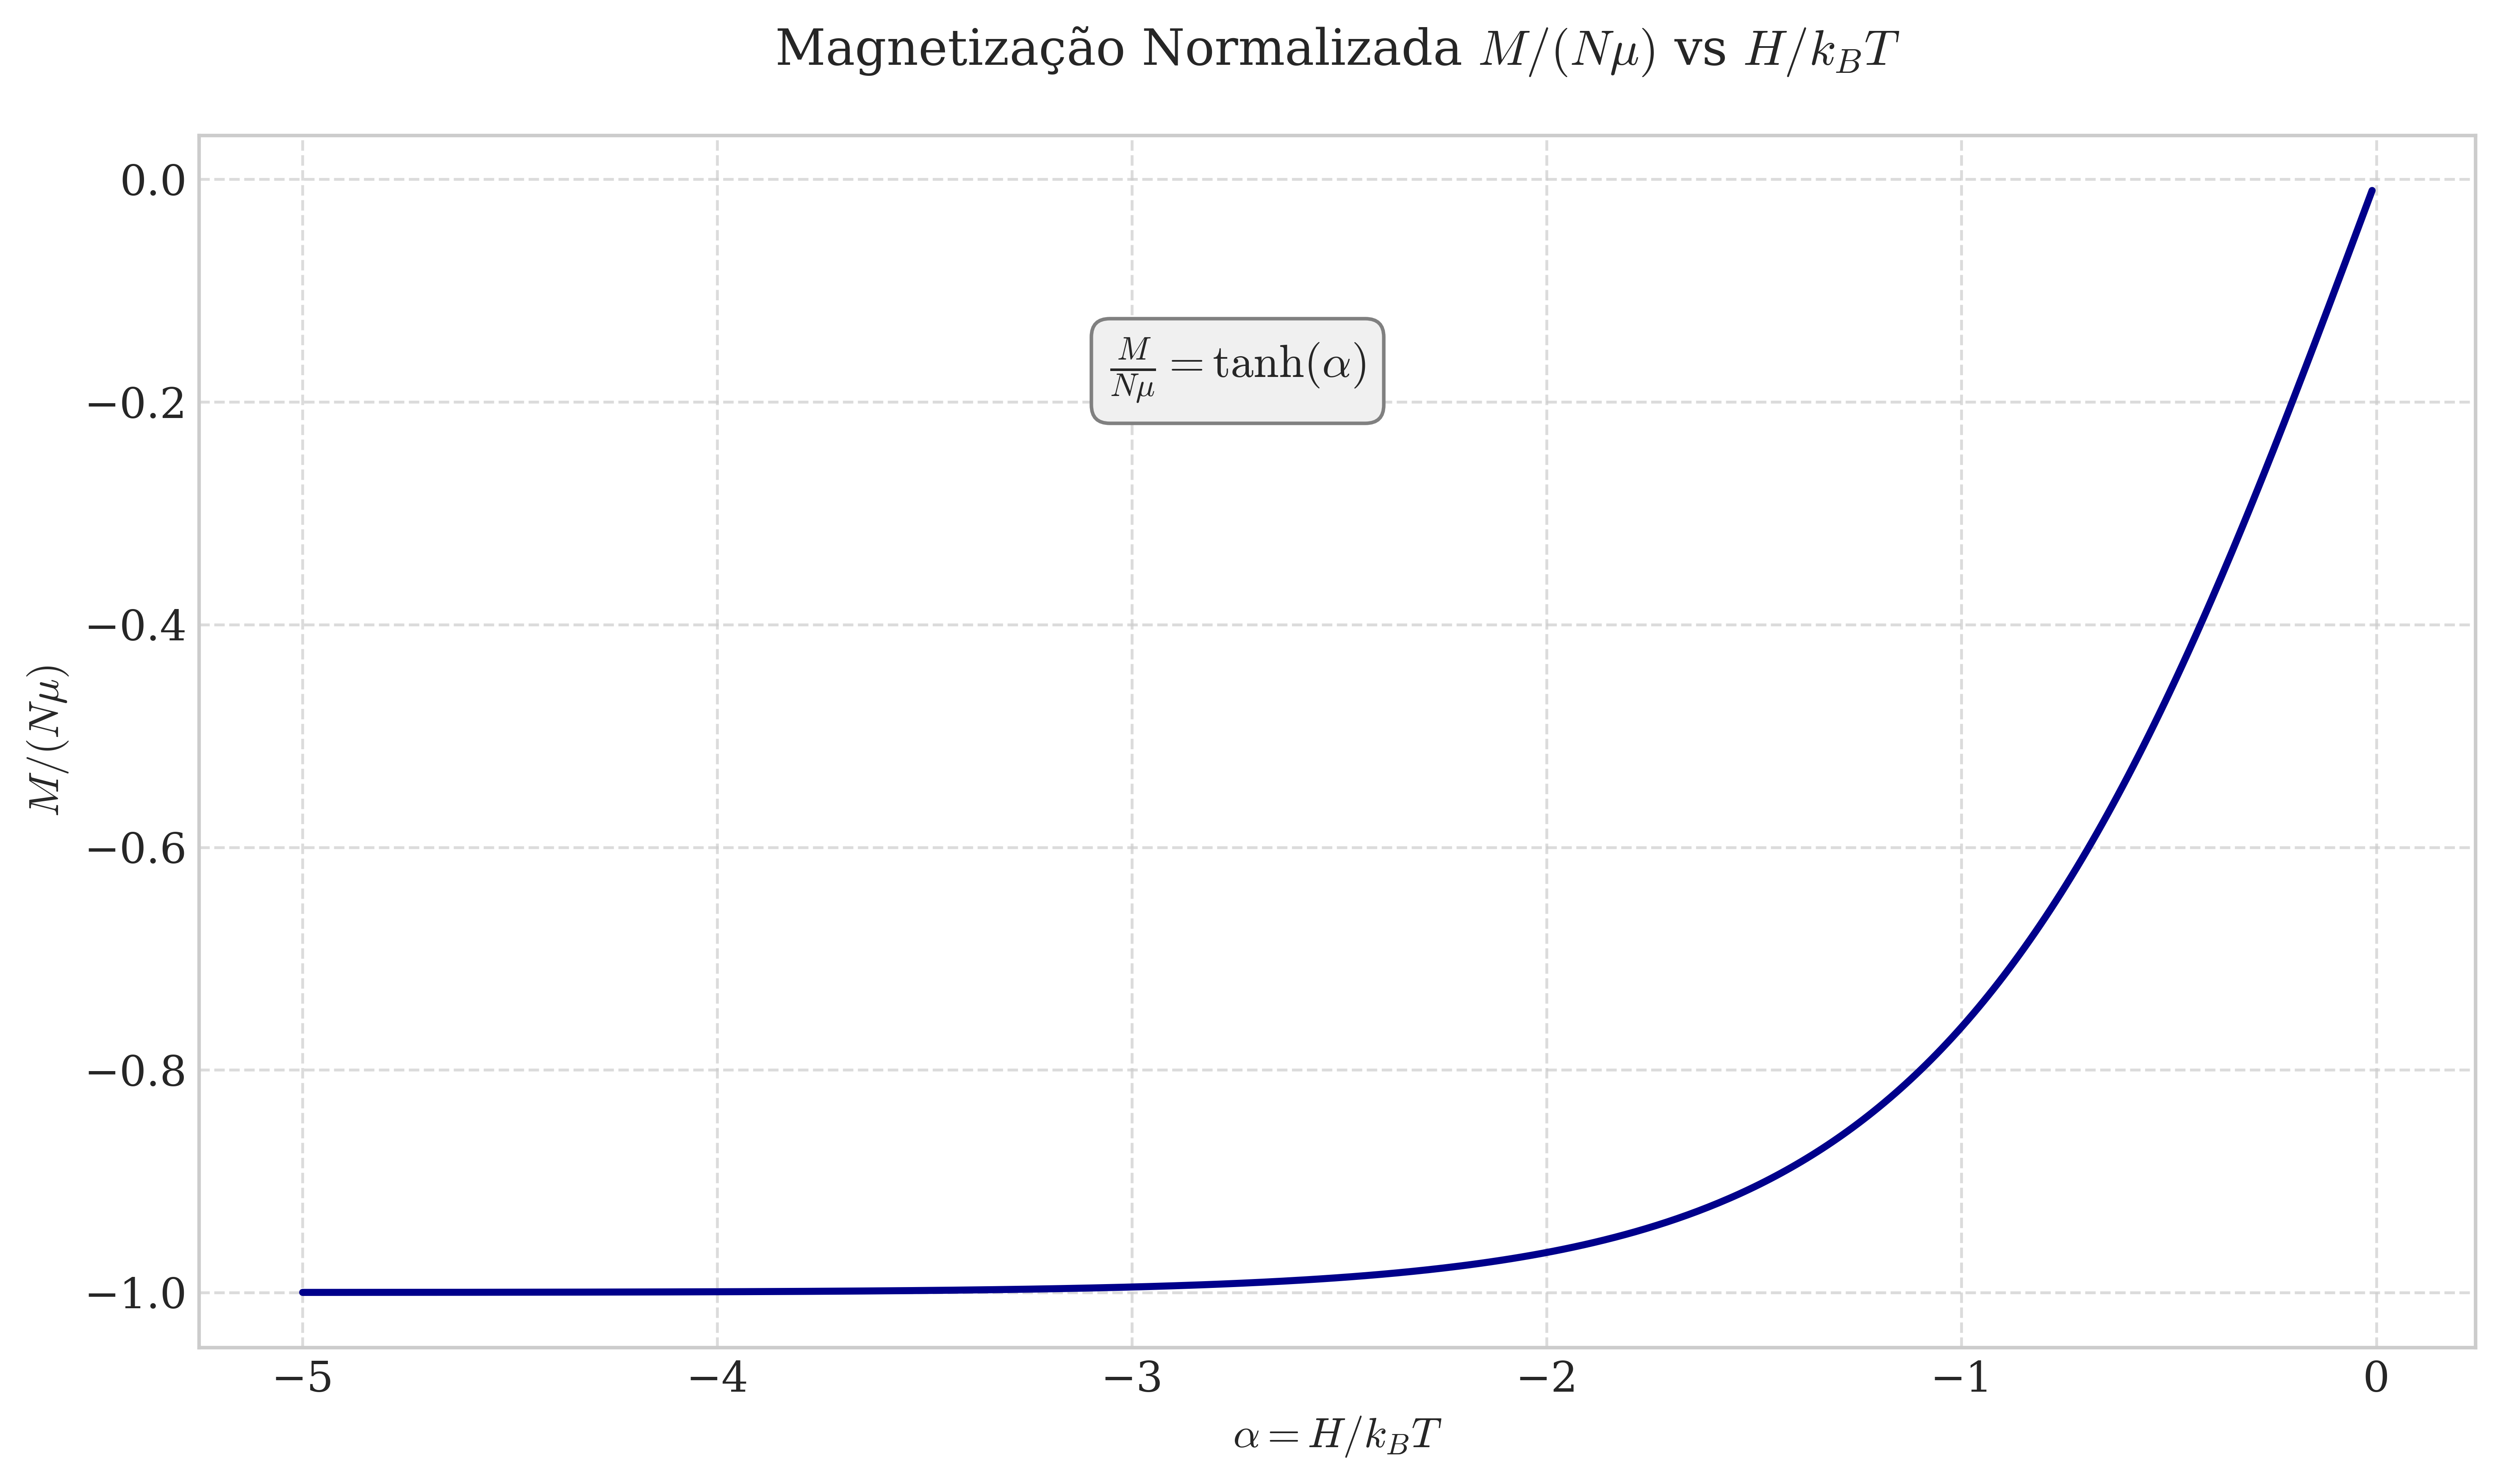

In [ ]:

# Função de magnetização para o modelo de Ising (aproximação de média campo)
def ising_magnetization(alpha_vals):
    # Magnetização normalizada M / (N mu) usando a aproximação de média campo
    return np.tanh(alpha_vals)

# Definindo os valores de alpha (H / k_B T)
alpha_vals = np.linspace(-0.01, -5, 400)
M_vals = ising_magnetization(alpha_vals)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(alpha_vals, M_vals, color='darkblue', linewidth=2)
plt.title('Magnetização Normalizada $M / (N\\mu)$ vs $H / k_B T$', fontsize=14, pad=20)
plt.xlabel(r'$\alpha = H / k_B T$', fontsize=12)
plt.ylabel(r'$M / (N \mu)$', fontsize=12)
plt.grid(True)

# Anotação da equação
plt.annotate(
    r"$\frac{M}{N \mu} = \tanh(\alpha)$",
    xy=(0.4, 0.8), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

plt.tight_layout()
plt.show()


### **A Fórmula para Magnetização**

$$
m = \frac{\sinh\left(\frac{H}{k_B T}\right)}{\sqrt{\sinh^2\left(\frac{H}{k_B T}\right) + e^{-4/t}}}
$$

Aqui, \( m \) representa a magnetização normalizada, \( \sinh \) é a função seno hiperbólica, e a equação descreve o comportamento de magnetização de um sistema de spins, levando em consideração o campo magnético \( H \), a temperatura \( T \), e a interação entre os spins.





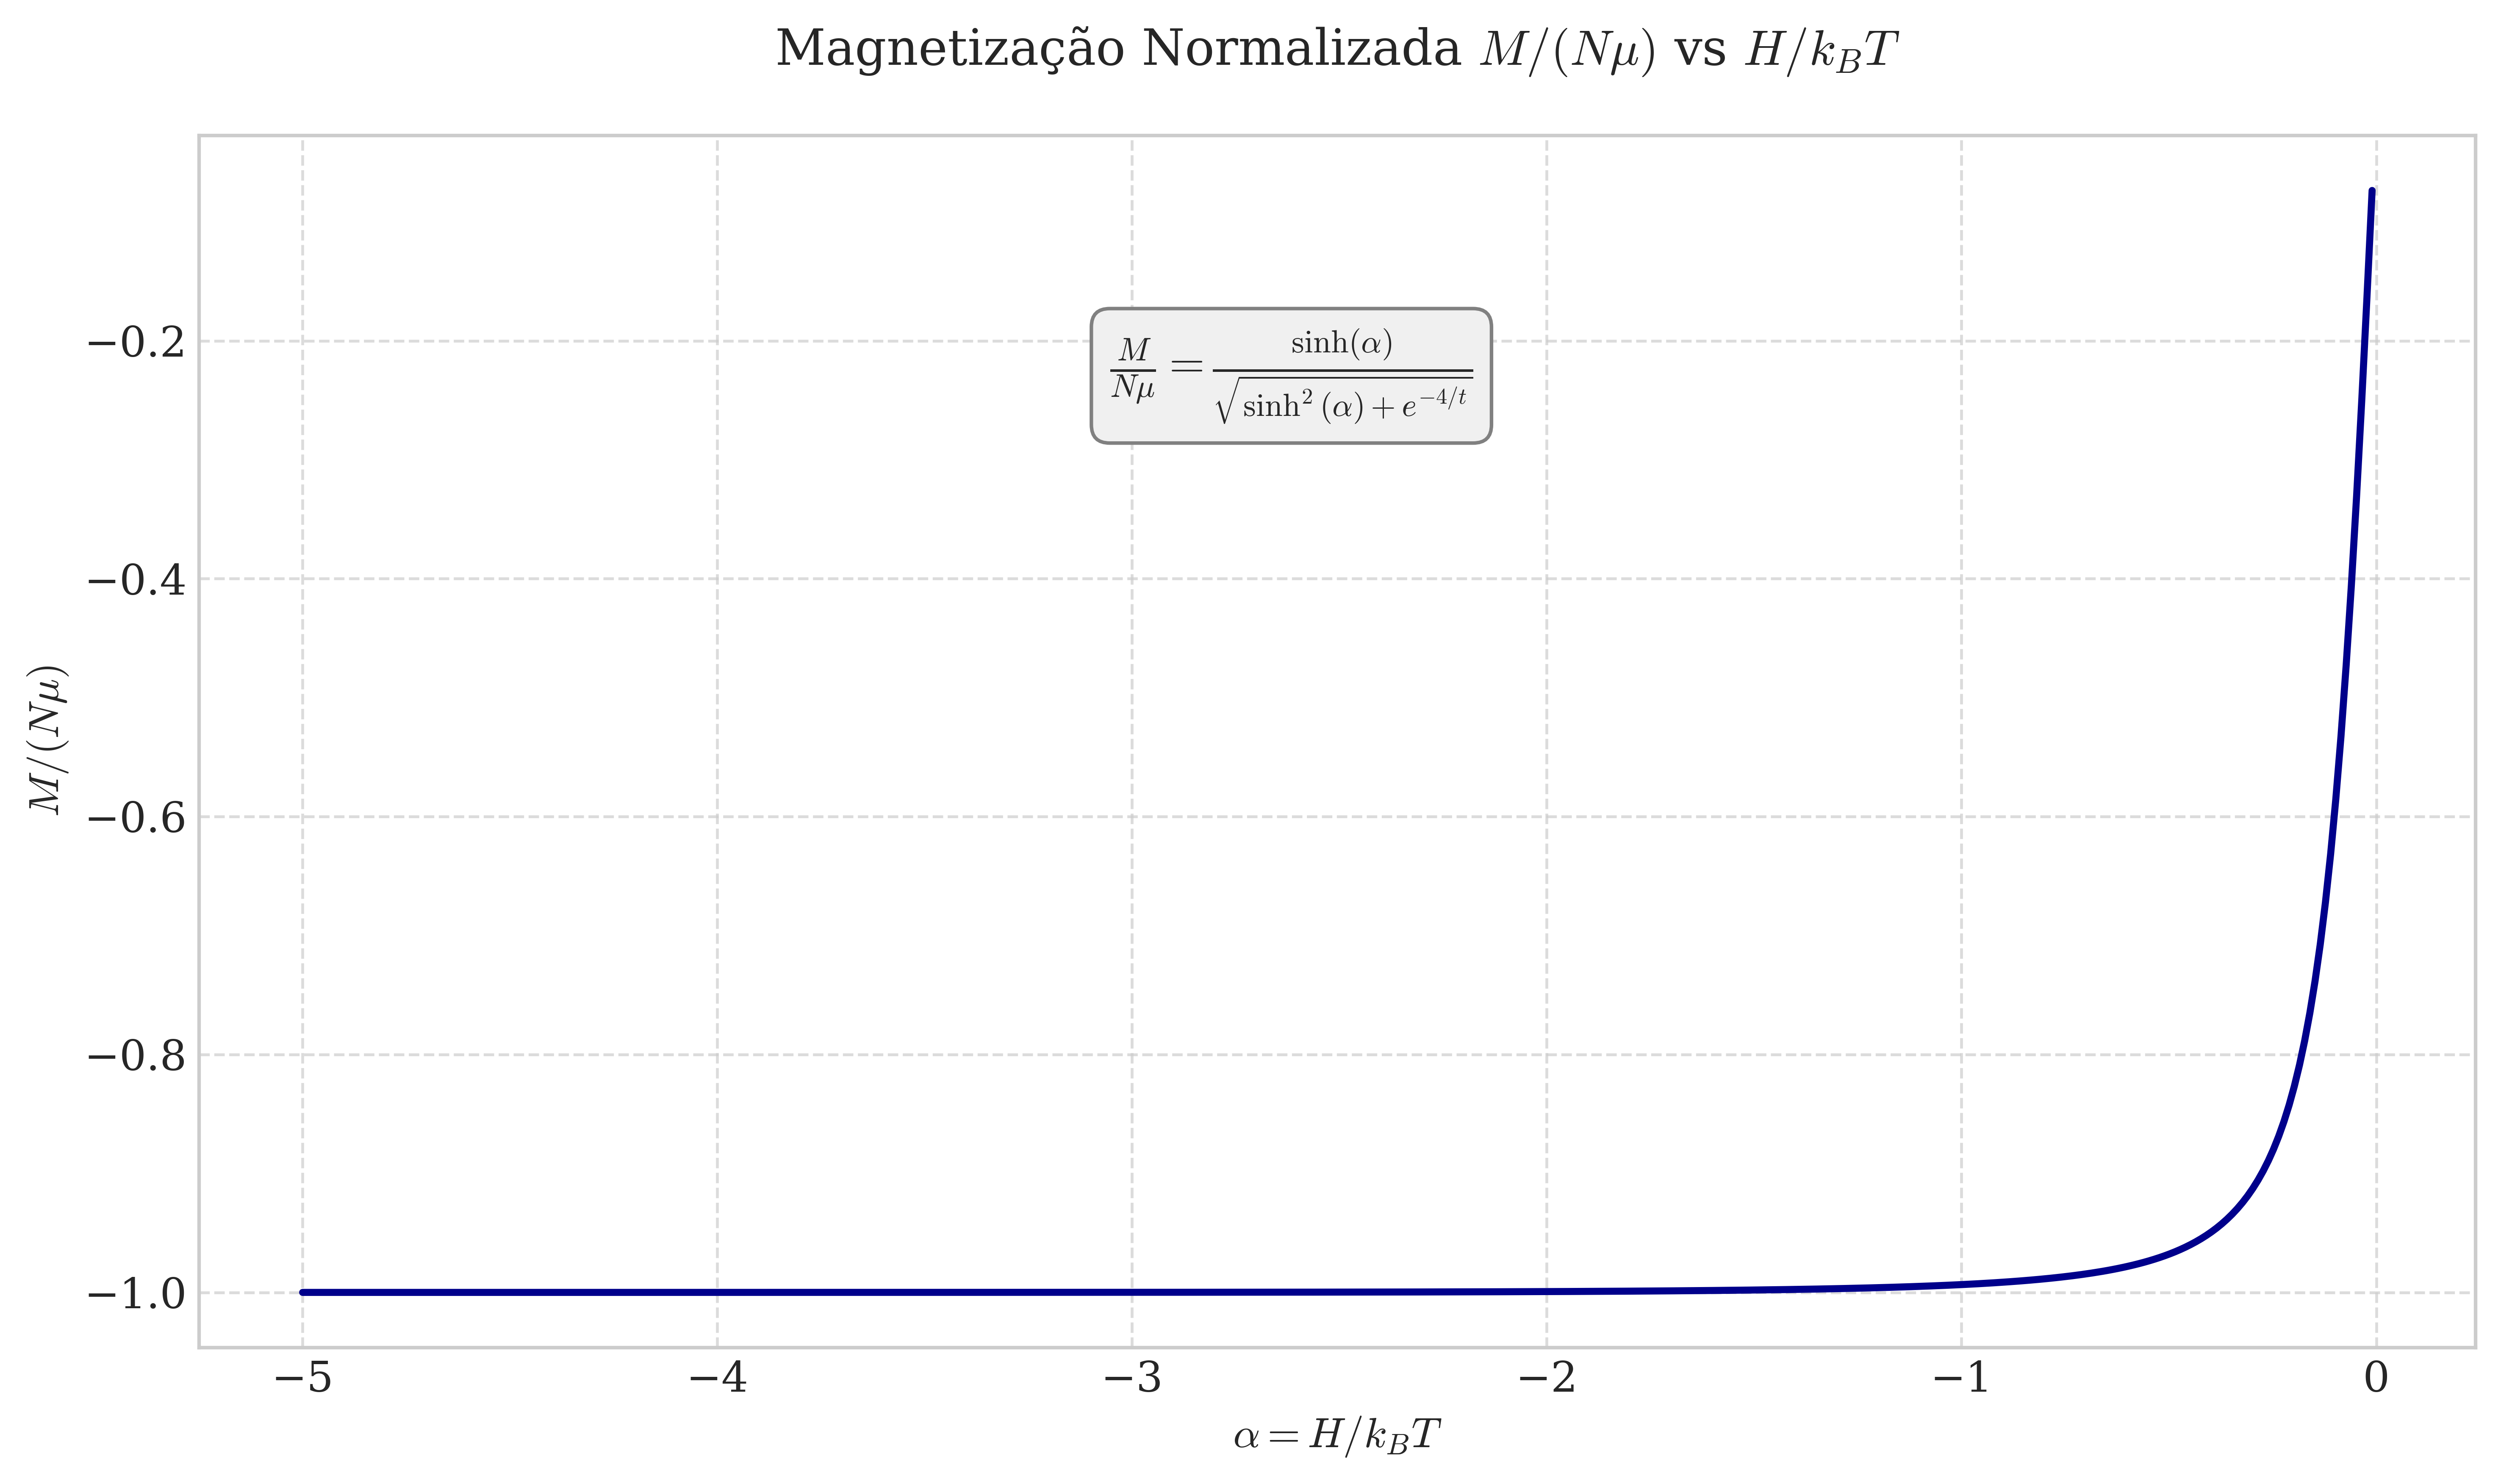

In [ ]:
# Função de magnetização com a fórmula fornecida, usando a temperatura reduzida t
def magnetization(alpha_vals, t):
    return np.sinh(alpha_vals) / np.sqrt(np.sinh(alpha_vals)**2 + np.exp(-4 / t))

# Definindo os valores de alpha (H / k_B T) e a temperatura reduzida t
alpha_vals = np.linspace(-0.01, -5, 400)

# Definindo a temperatura reduzida t (t = J / k_B T)
t = 1.0  # Escolha da temperatura reduzida, por exemplo, t = 1.0

M_vals = magnetization(alpha_vals, t)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(alpha_vals, M_vals, color='darkblue', linewidth=2)
plt.title('Magnetização Normalizada $M / (N\\mu)$ vs $H / k_B T$', fontsize=14, pad=20)
plt.xlabel(r'$\alpha = H / k_B T$', fontsize=12)
plt.ylabel(r'$M / (N \mu)$', fontsize=12)
plt.grid(True)

# Anotação da equação
plt.annotate(
    r"$\frac{M}{N \mu} = \frac{\sinh(\alpha)}{\sqrt{\sinh^2(\alpha) + e^{-4/t}}}$",
    xy=(0.4, 0.8), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

plt.tight_layout()
plt.show()

A equação da forma:
$$
m = m_0 \tanh\left(\frac{m H}{k_B T}\right)
$$

ou em forma reduzida:

$$
m = m_0 \tanh\left(\frac{m}{t}\right)
$$

(com $( t = \frac{K_B T}{J} )$, temperatura reduzida)


- \( m \): magnetização normalizada (por spin).
- $( m_0 )$: magnetização máxima (saturação), normalmente igual a 1.
- $( \tanh )$: função hiperbólica tangente.
- $( t = \frac{K_B T}{J} )$: temperatura reduzida, sendo \( J \) a constante de acoplamento entre spins.

---

### **Origem da equação no modelo de Ising de campo médio**

Na aproximação de campo médio, cada spin sente um **campo efetivo** proporcional à magnetização total \( m \). O sistema então tenta resolver a seguinte equação

$$
m = \tanh\left(\frac{J z m}{K_B T}\right)
$$

Onde:
- \( J \): energia de interação spin-spin,
- \( z \): número de vizinhos (coordenação),
- $( K_B )$: constante de Boltzmann,
- \( T \): temperatura.

Se definirmos:

$$
t = \frac{k_B T}{J z}
\Rightarrow m = \tanh\left(\frac{m}{t}\right)
$$

Essa é uma **equação implícita** para \( m \): não conseguimos isolar \( m \) diretamente, precisamos resolvê-la numericamente.



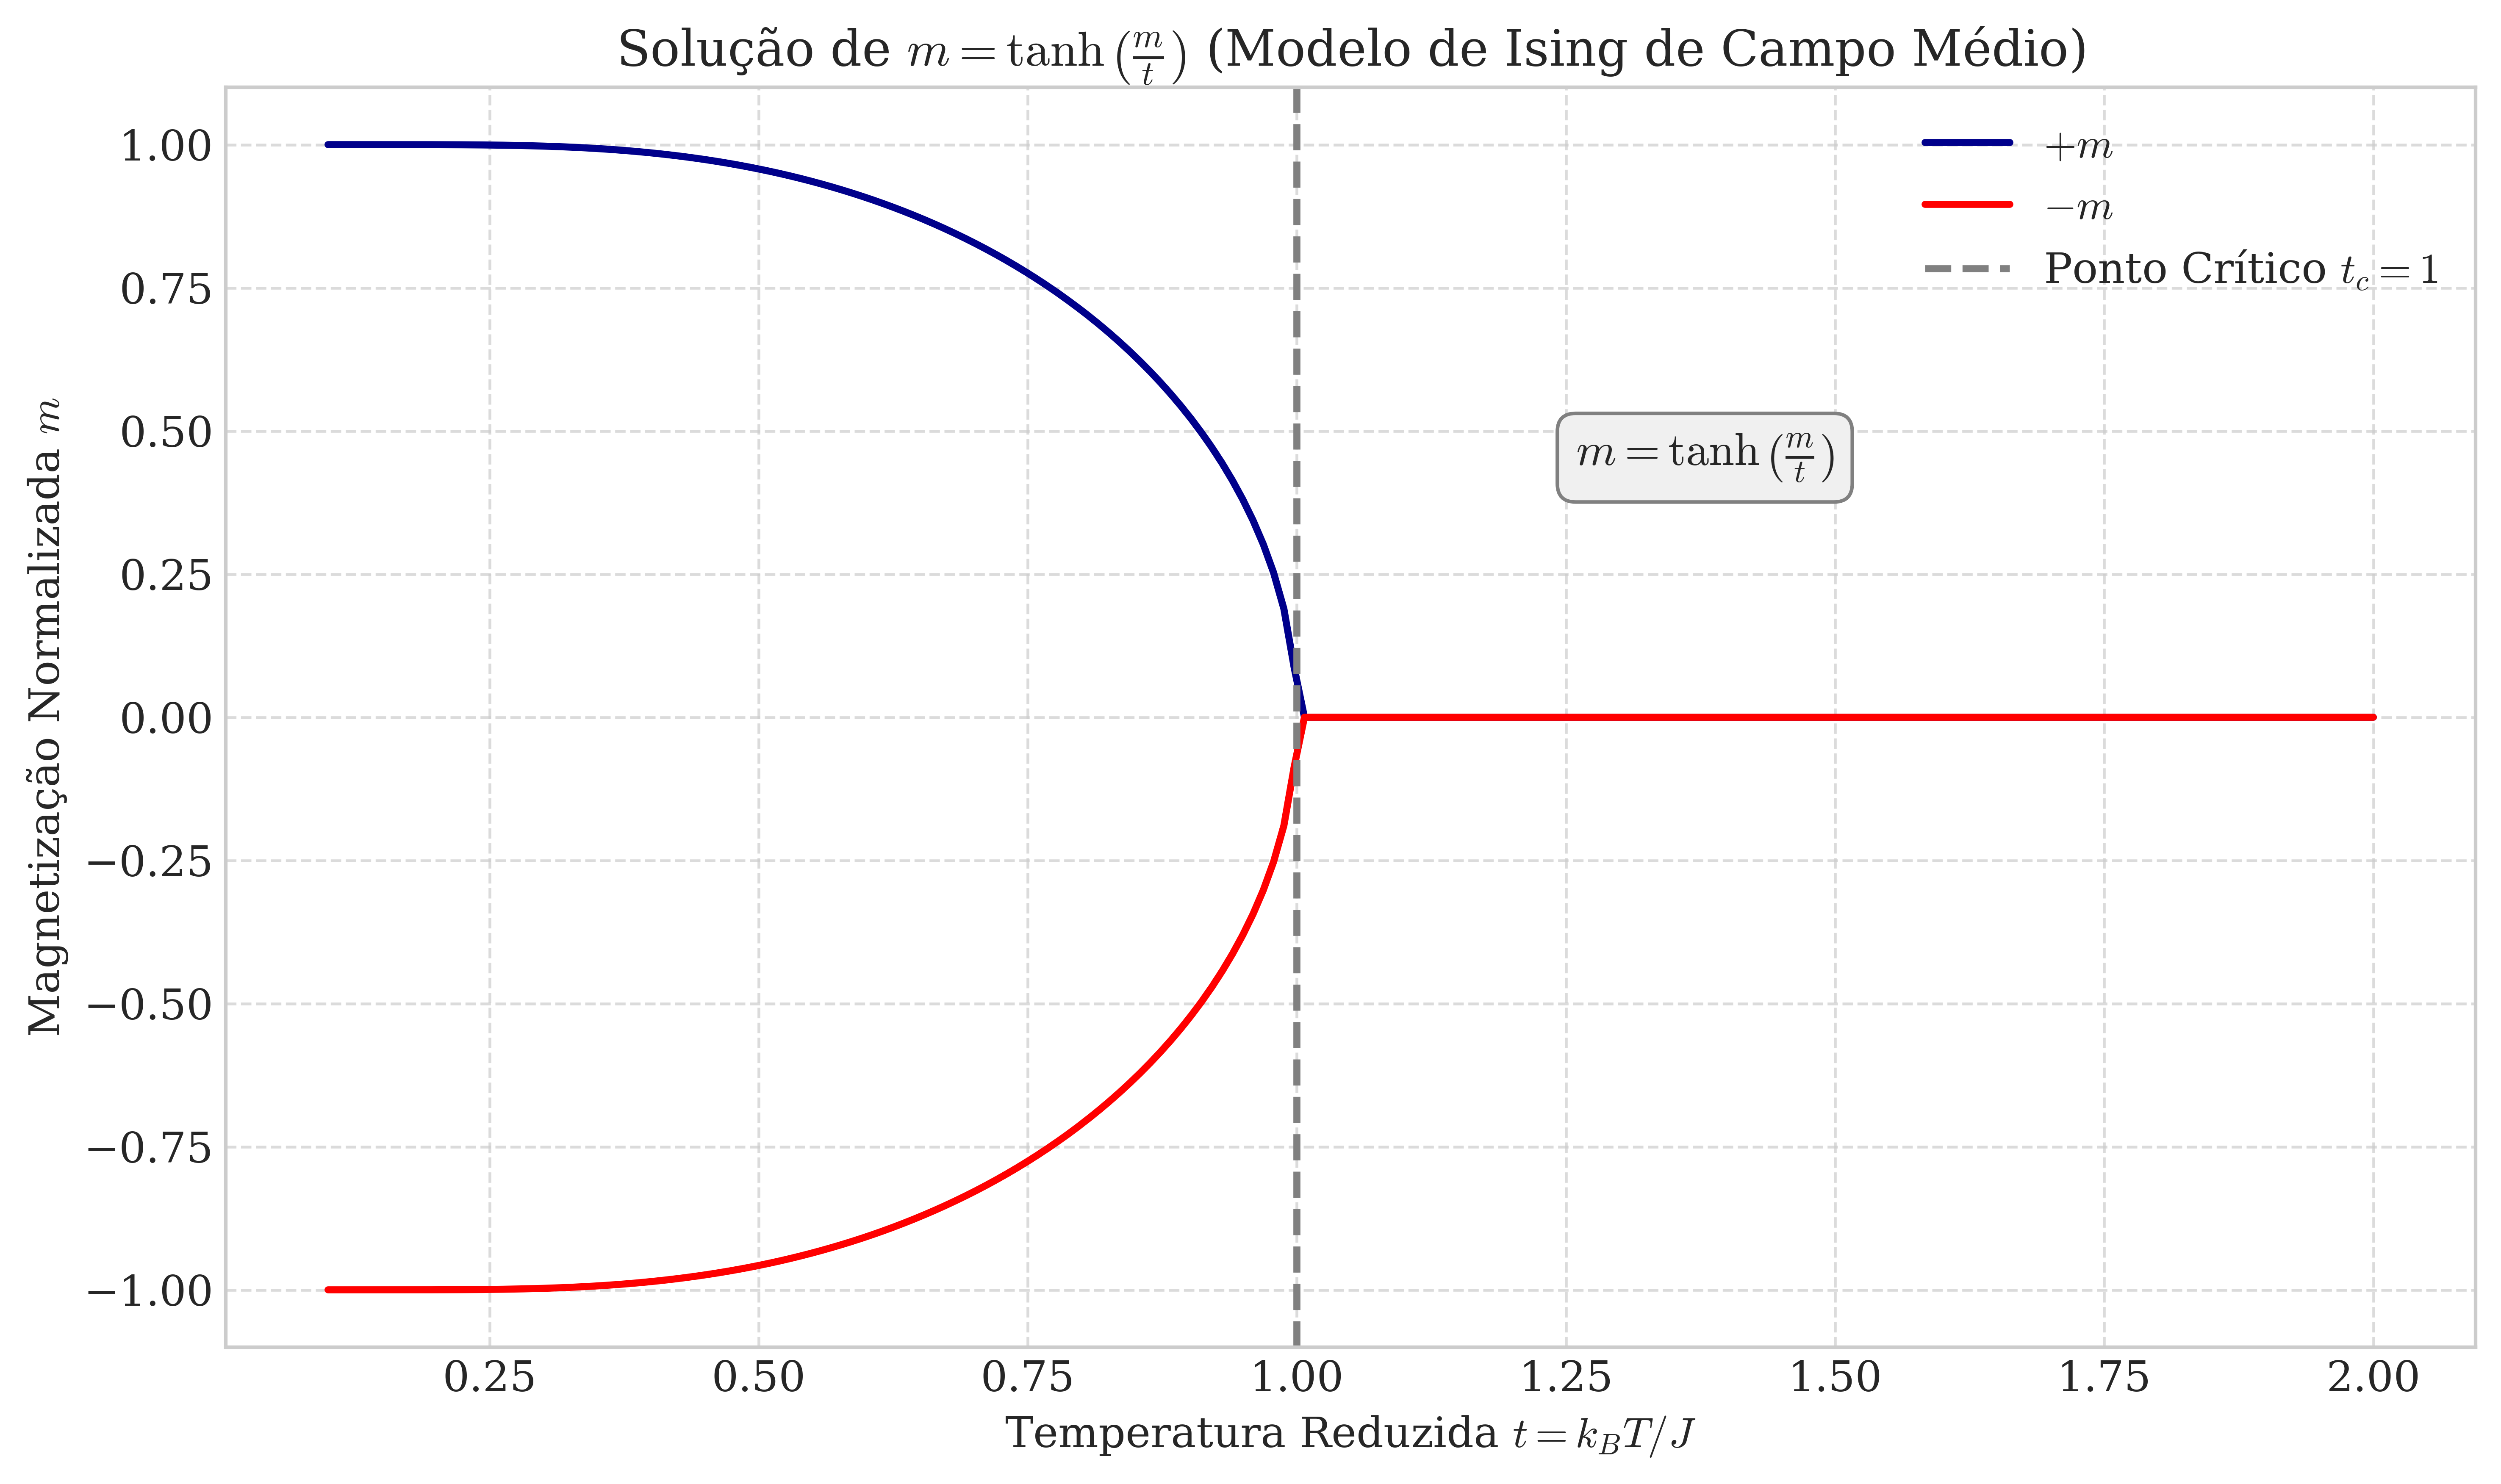

In [ ]:
# Temperaturas reduzidas
t_vals = np.linspace(0.1, 2.0, 200)
m_vals = []

# Função implícita: m - tanh(m / t) = 0
def self_consistent_eq(m, t):
    return m - np.tanh(m / t)

# Resolver numericamente para cada valor de t
for t in t_vals:
    # Chute inicial próximo de 1 para pegar solução positiva
    m_solution = fsolve(self_consistent_eq, x0=0.9, args=(t))[0]
    m_vals.append(m_solution)

# Também calcular -m(t) para representar a simetria (m negativo)
m_vals_neg = [-m for m in m_vals]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(t_vals, m_vals, label=r'$+m$', color='darkblue', linewidth=2)
plt.plot(t_vals, m_vals_neg, label=r'$-m$', color='red', linewidth=2)
plt.axvline(1.0, color='gray', linestyle='--', label='Ponto Crítico $t_c = 1$')
plt.title(r'Solução de $m = \tanh\left(\frac{m}{t}\right)$ (Modelo de Ising de Campo Médio)', fontsize=14)
plt.xlabel('Temperatura Reduzida $t = k_B T / J$', fontsize=12)
plt.ylabel('Magnetização Normalizada $m$', fontsize=12)
plt.legend()
plt.grid(True)

# Anotação da equação
plt.annotate(
    r"$m = \tanh\left(\frac{m}{t}\right)$",
    xy=(0.6, 0.7), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

plt.tight_layout()
plt.show()


$$
m = m_0 \tanh\left(\frac{B q m}{2 t}\right)
$$



- \( m \): magnetização normalizada da rede (o que queremos descobrir).
- $( m_0 )$: magnetização de saturação (valor máximo de magnetização possível), geralmente \( m_0 = 1 \).
- \( B \): constante relacionada ao campo efetivo (ou à interação de troca).
- \( q \): número de vizinhos (número de coordenação da rede).
- \( t \): **temperatura reduzida**, definida como $( t = \frac{k_B T}{J} )$, com:
  - \( T \): temperatura absoluta,
  - \( J \): energia de interação entre spins.

<br>


Essa equação mostra que a magnetização \( m \) depende dela mesma — ou seja, é uma **equação implícita**, pois \( m \) aparece dos dois lados. A parte de dentro da tangente hiperbólica representa um **campo efetivo médio** sentido por cada spin, proporcional à média dos outros spins \( m \), ao número de vizinhos \( q \) e ao inverso da temperatura \( t \).

---

### Transição de fase:

- Para **altas temperaturas**$ ( t \gg 1 )$, o argumento da tangente hiperbólica tende a zero, e:
  $$
  \tanh\left(\frac{B q m}{2 t}\right) \approx \frac{B q m}{2 t} \Rightarrow m \approx \frac{B q m_0 m}{2 t}
  $$
  ⇒ única solução possível: \( m = 0 \) → **fase paramagnética**.

- Para **baixas temperaturas** (\( t < t_c \)), aparecem soluções \( m \ne 0 \), indicando **magnetização espontânea** → **fase ferromagnética**.

---

### Temperatura crítica \( t_c \)

A temperatura crítica pode ser estimada da condição onde a derivada da função do lado direito da equação se iguala a 1:

$$
\left. \frac{d}{dm} \left[ m_0 \tanh\left(\frac{B q m}{2 t} \right) \right] \right|_{m=0} = 1
$$

Como a derivada de \( \tanh(x) \) em \( x = 0 \) é 1:

$$
m_0 \cdot \frac{B q}{2 t_c} = 1 \Rightarrow t_c = \frac{B q m_0}{2}
$$

Ou seja: **quanto maior \( q \)** (ou \( B \)), **maior a temperatura crítica**.

---

A
 equação modela o comportamento magnético de um sistema que tenta se alinhar (magnetizar), mas é constantemente "atrapalhado" pela temperatura (energia térmica). Quando a temperatura é baixa, o sistema consegue se alinhar; quando é alta, o "barulho térmico" impede a ordenação.


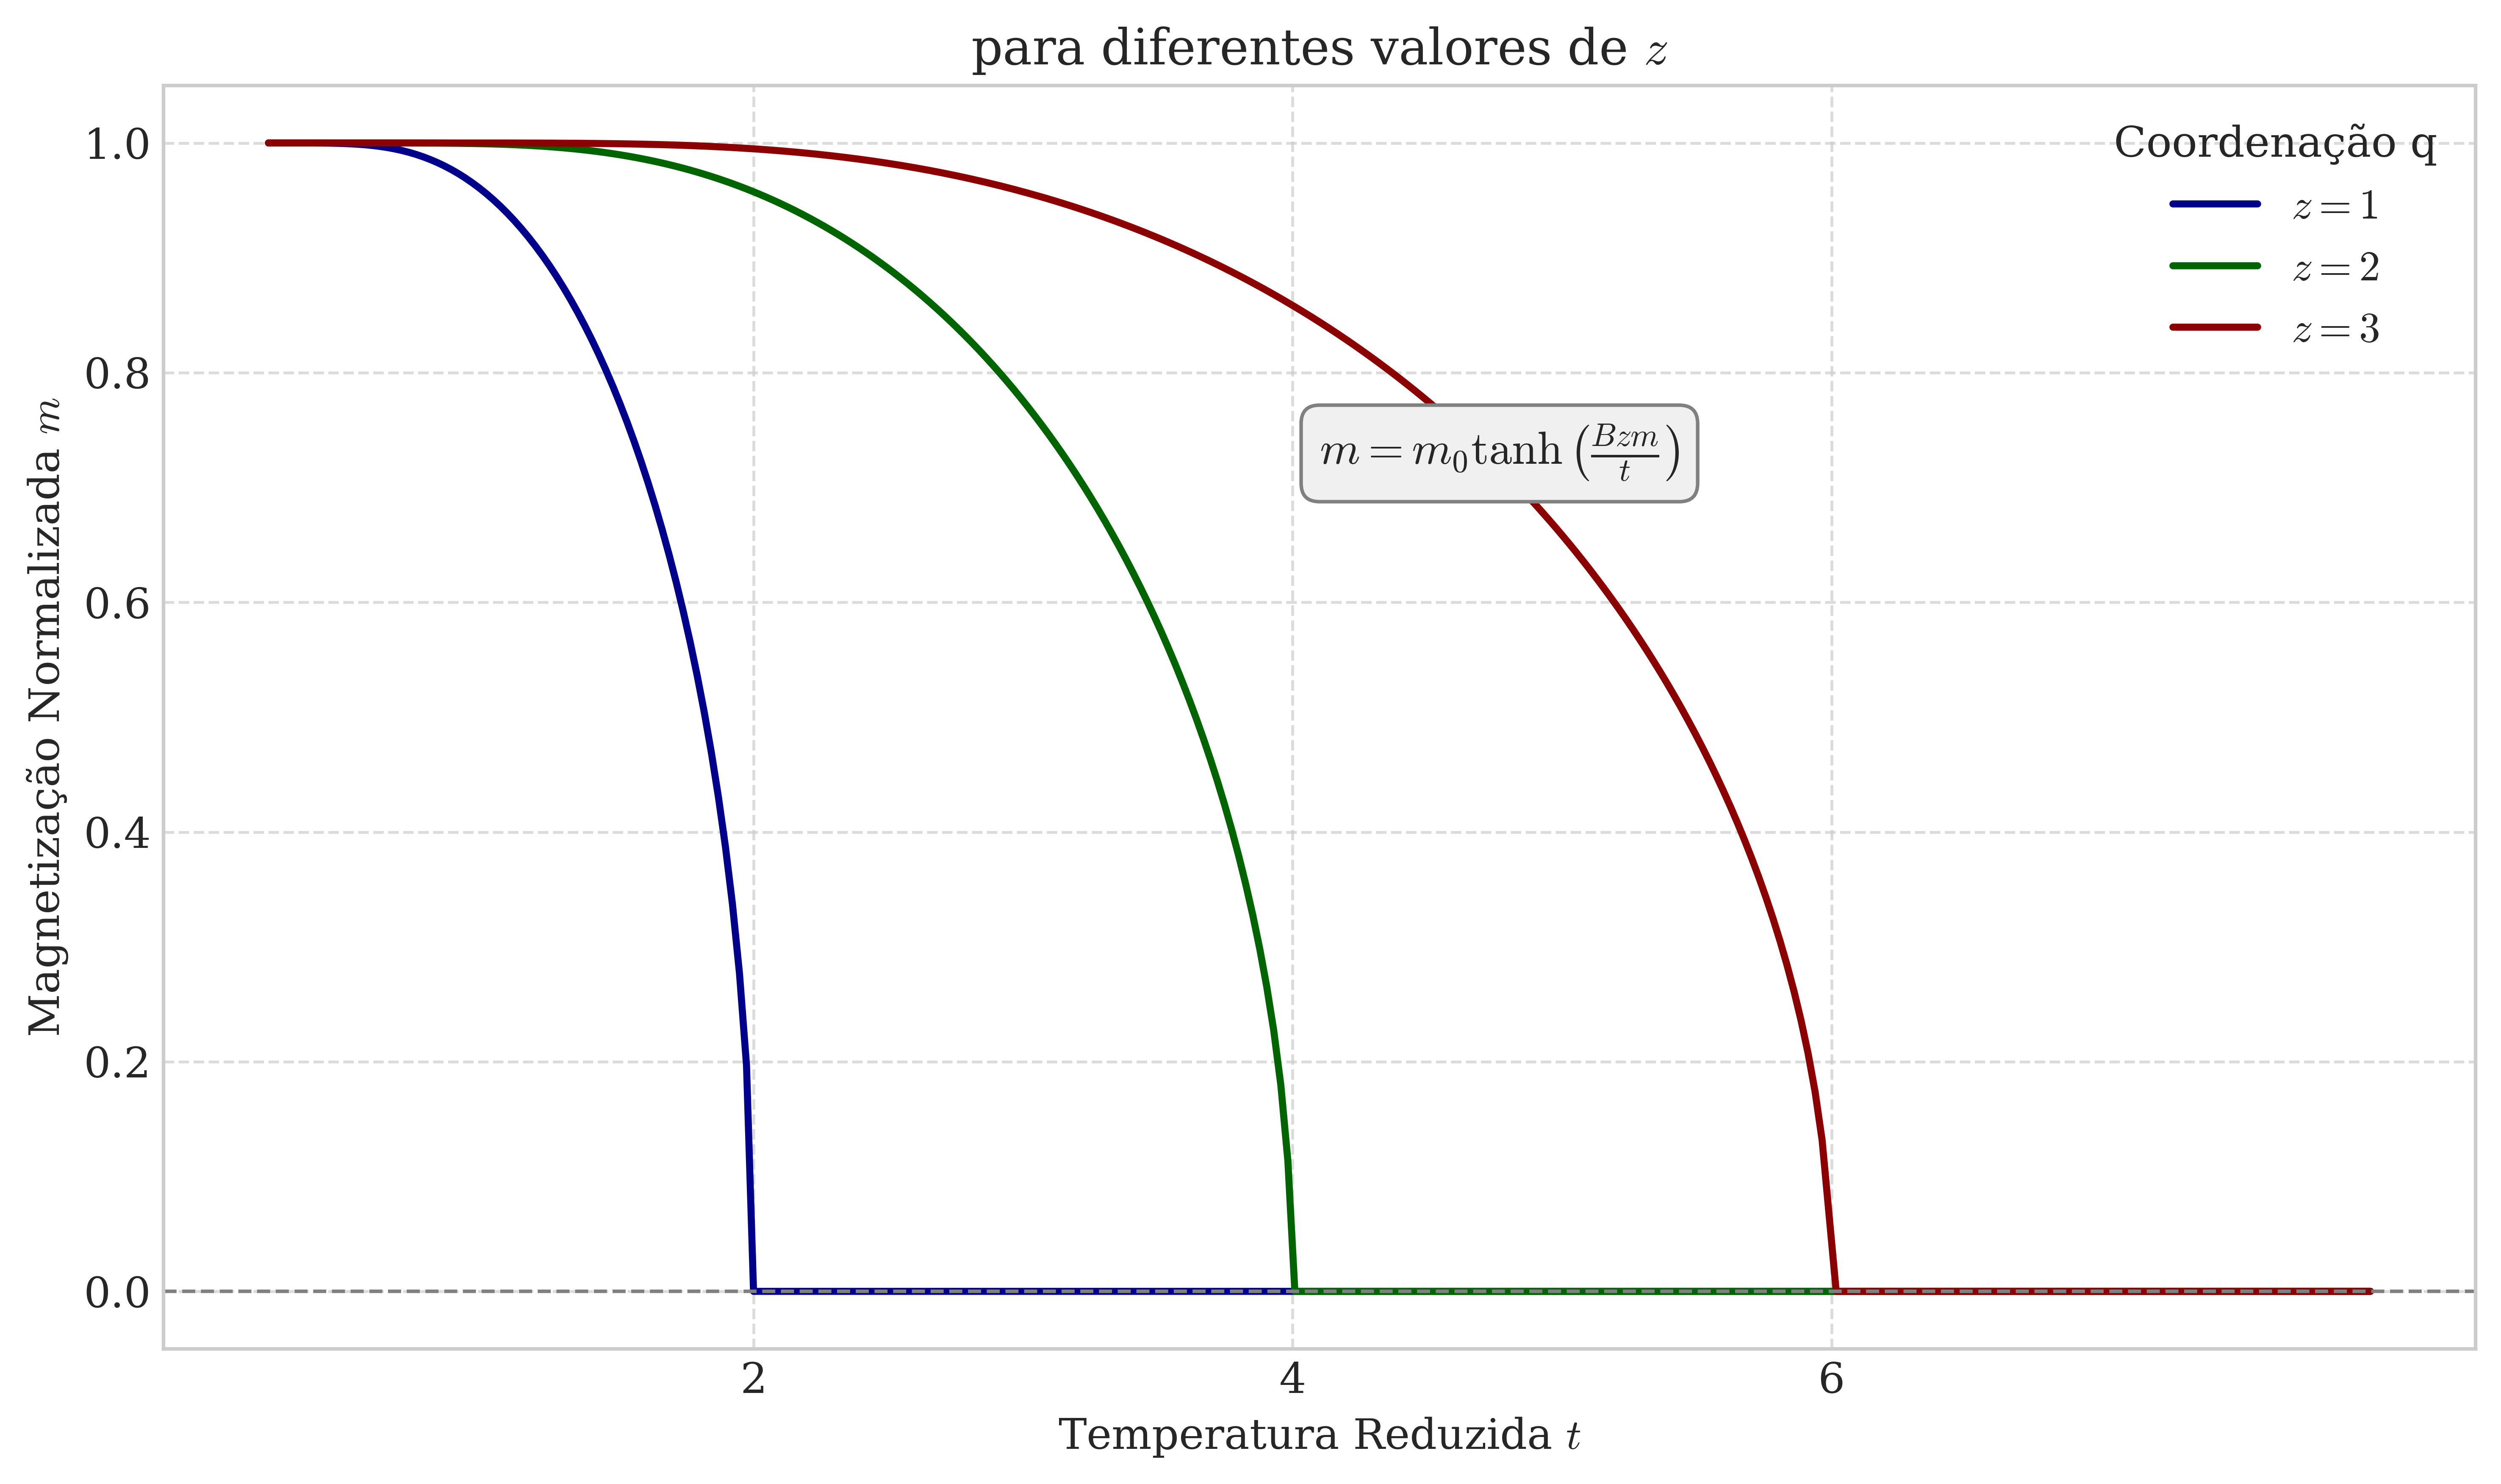

In [16]:
# Constantes
m0 = 1      # Magnetização máxima
B = 1       # Campo externo

# Temperatura reduzida
t_vals = np.linspace(0.1, 4.0, 300)

# Diferentes valores de q para comparação
qs = [1, 2, 3]
colors = ['darkblue', 'darkgreen', 'darkred']
labels = []

plt.figure(figsize=(10, 6))

# Para cada valor de q, resolver e plotar
for q, color in zip(qs, colors):
    factor = B * q
    m_vals = []

    def eq_m(m, t):
        return m - m0 * np.tanh(factor * m / t)

    for t in t_vals:
        m_sol = fsolve(eq_m, x0=0.9, args=(t))[0]
        m_vals.append(m_sol)

    plt.plot([t*2 for t in t_vals], m_vals, label=fr'$z={q}$', color=color, linewidth=2)

# Detalhes do gráfico
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(r'para diferentes valores de $z$', fontsize=14)
plt.xlabel('Temperatura Reduzida $t$', fontsize=12)
plt.ylabel('Magnetização Normalizada $m$', fontsize=12)
plt.grid(True)
plt.legend(title='Coordenação q')

# Anotação da equação
plt.annotate(
    r"$m = m_0 \tanh\left(\frac{B z m}{t}\right)$",
    xy=(0.5, 0.7), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

plt.xticks(
    ticks=[2, 4, 6],
    labels=['2', '4', '6']
)


plt.tight_layout()
plt.show()


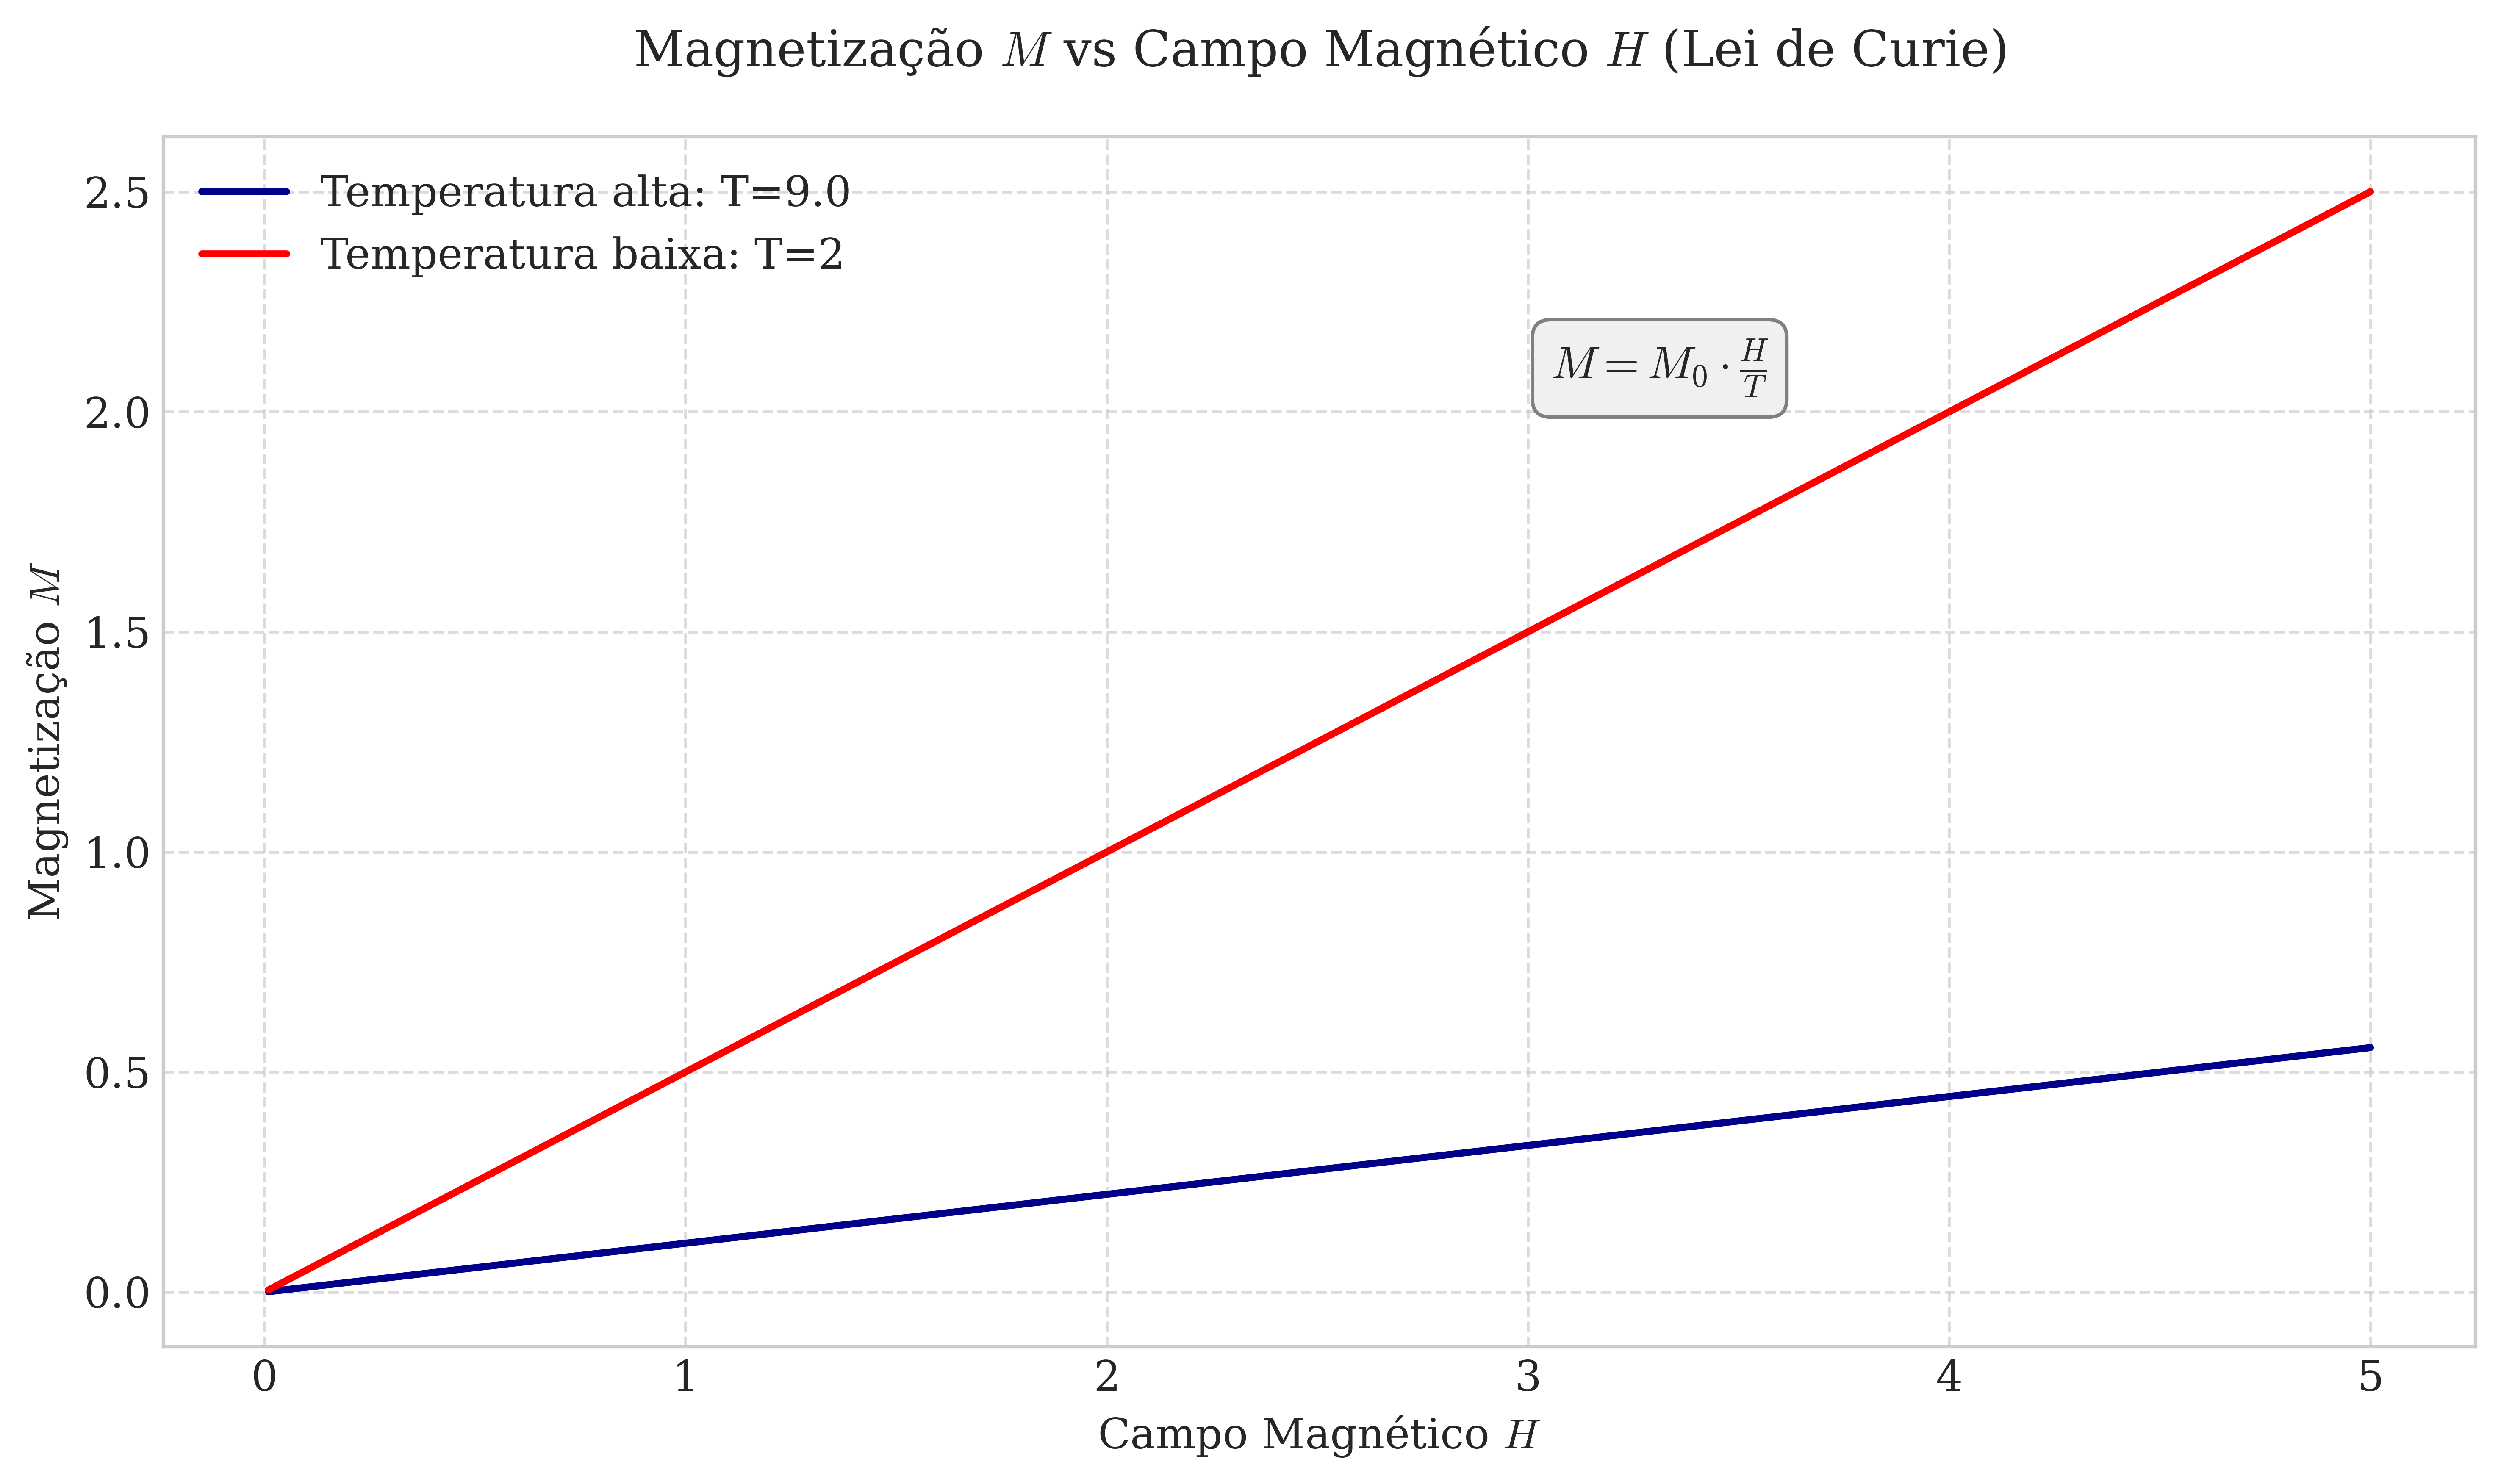

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
M0 = 1.0  # Magnetização máxima (M0)
H_vals = np.linspace(0.01, 5, 400)  # Valores do campo magnético H

# Função para calcular a magnetização com a Lei de Curie
def magnetization(H_vals, T):
    return M0 * H_vals / T

# Definindo duas temperaturas diferentes (alta e baixa)
T_high = 9.0  # Temperatura alta
T_low = 2   # Temperatura baixa

# Calculando a magnetização para diferentes temperaturas
M_high = magnetization(H_vals, T_high)
M_low = magnetization(H_vals, T_low)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(H_vals, M_high, label=f'Temperatura alta: T={T_high}', color='darkblue', linewidth=2)
plt.plot(H_vals, M_low, label=f'Temperatura baixa: T={T_low}', color='red', linewidth=2)
plt.title('Magnetização $M$ vs Campo Magnético $H$ (Lei de Curie)', fontsize=14, pad=20)
plt.xlabel('Campo Magnético $H$', fontsize=12)
plt.ylabel('Magnetização $M$', fontsize=12)
plt.legend()
plt.grid(True)

# Anotação da equação
plt.annotate(
    r"$M = M_0 \cdot \frac{H}{T}$",
    xy=(0.6, 0.8), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


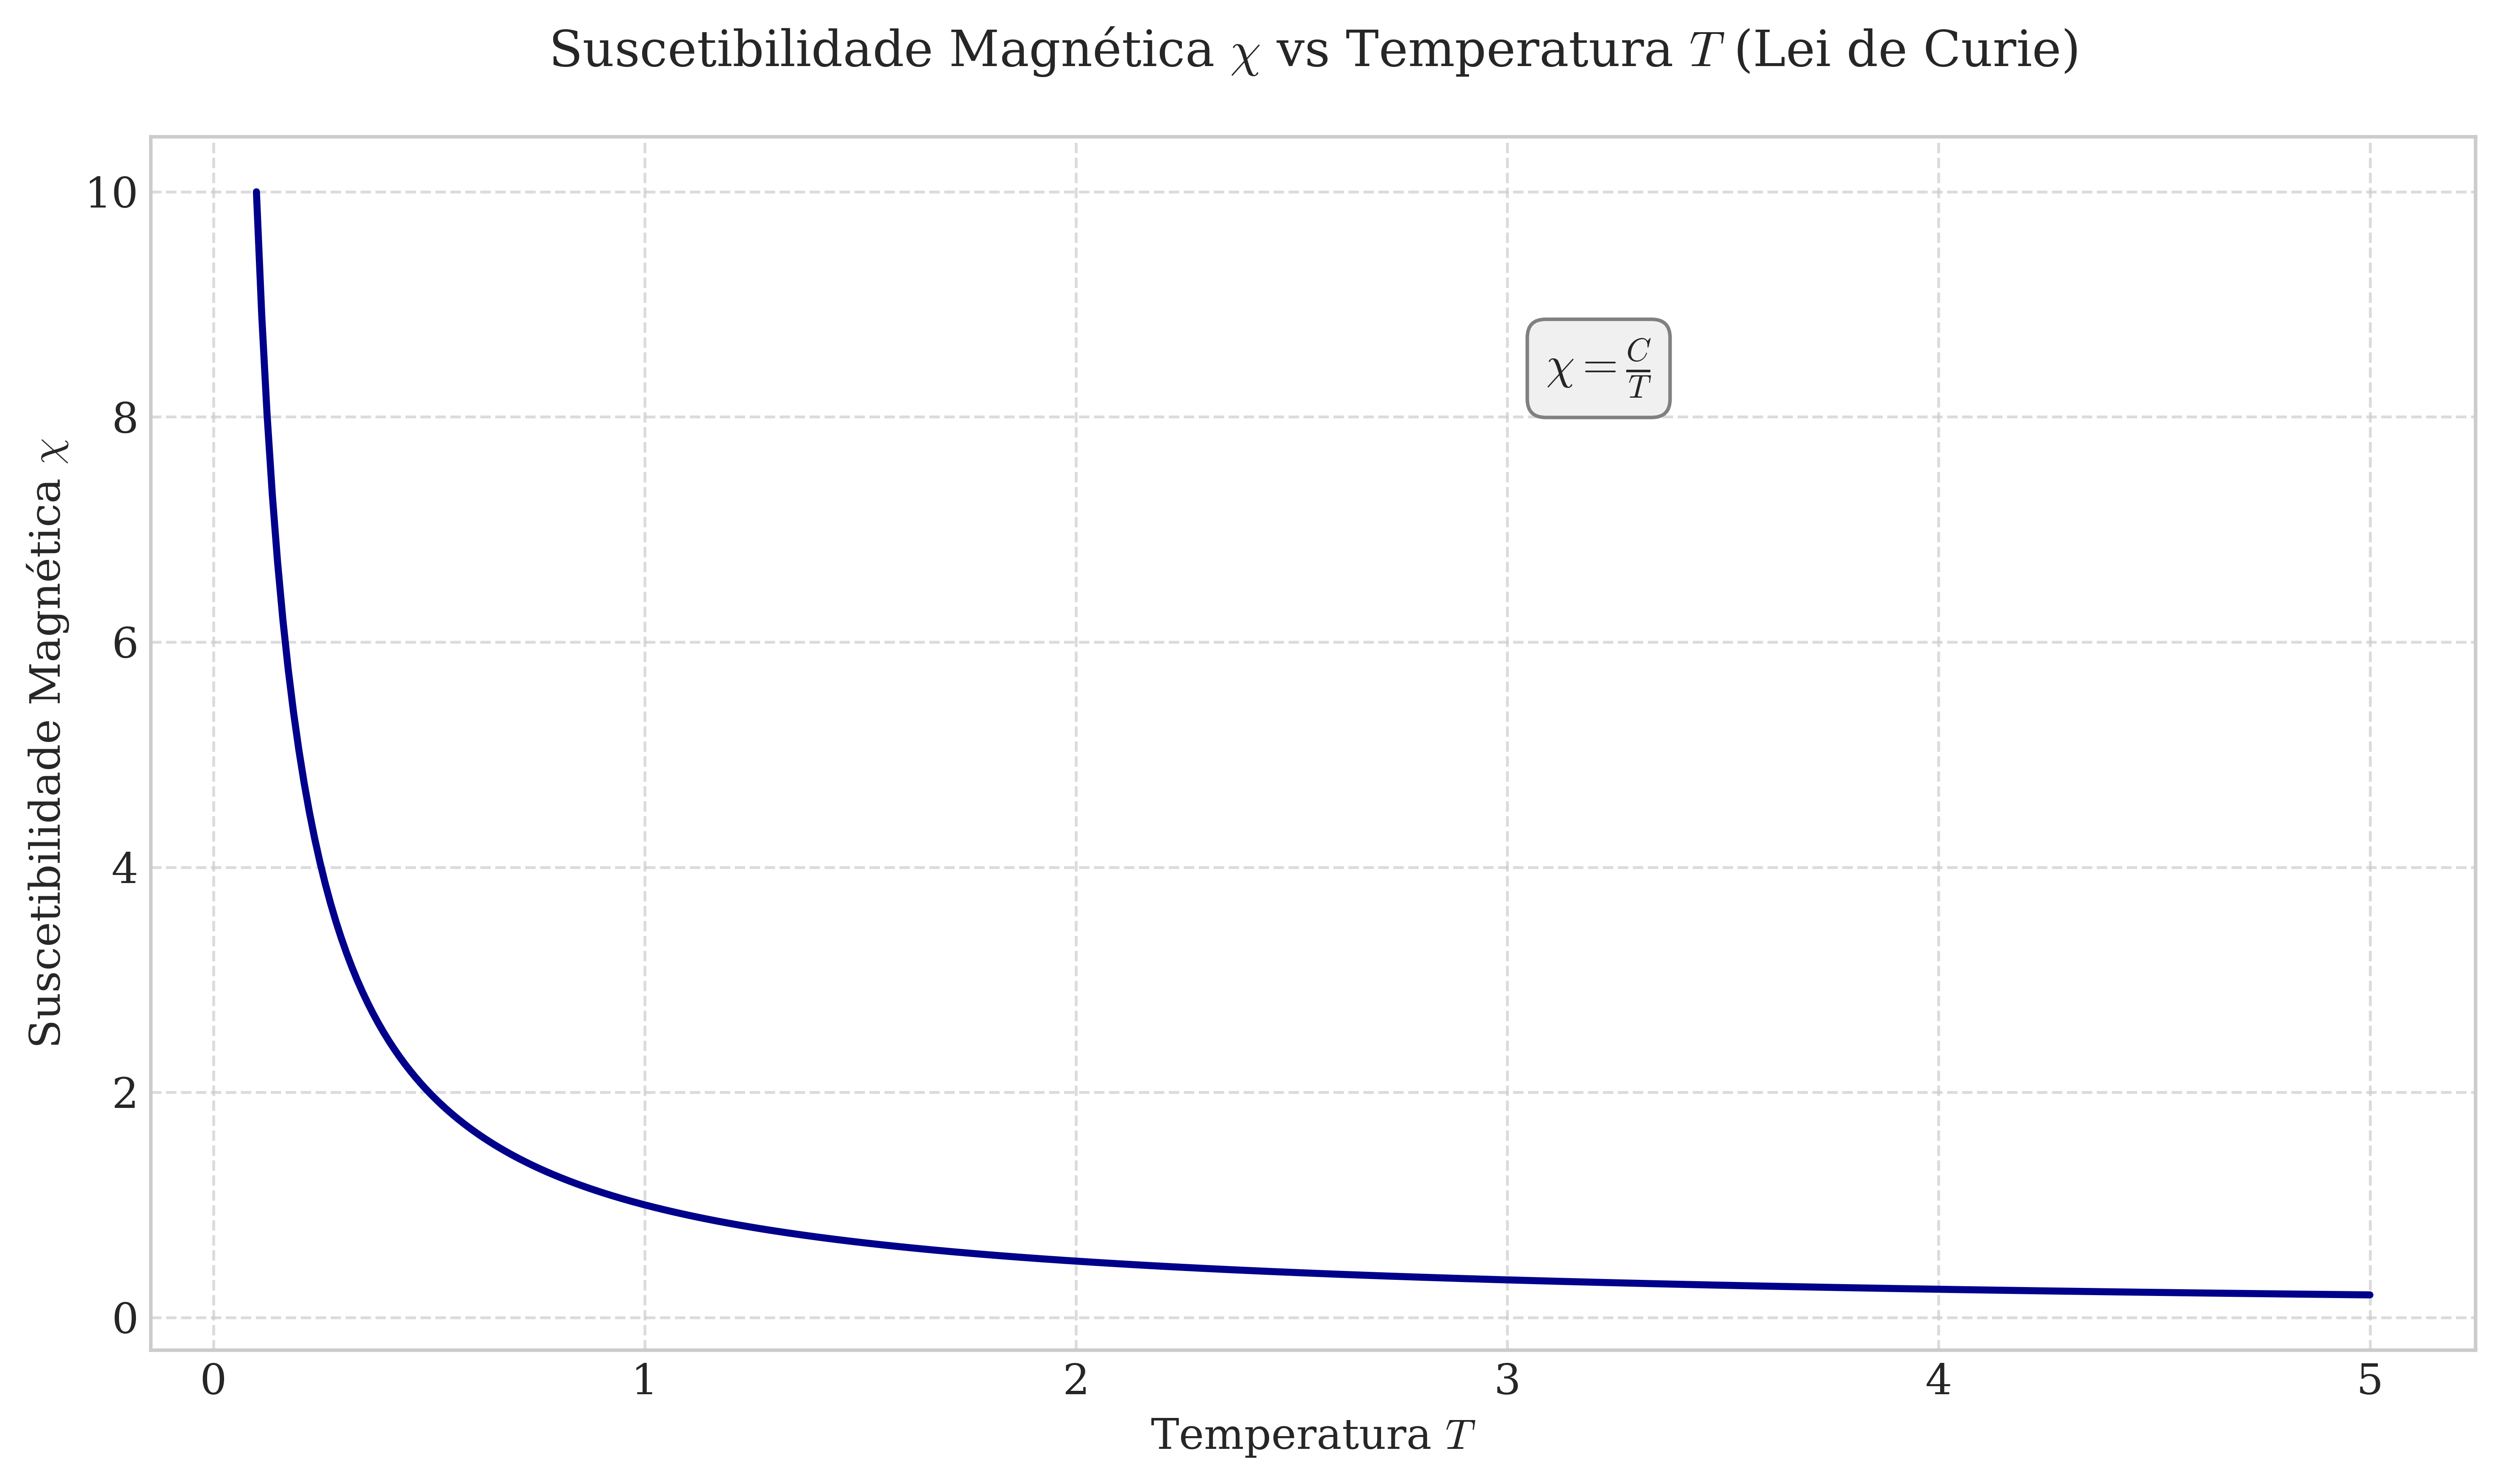

In [ ]:


# Constantes
C = 1.0  # Constante de Curie
T_vals = np.linspace(0.1, 5, 400)  # Intervalo de temperaturas (evitar T=0)

# Função para calcular a suscetibilidade magnética
def susceptibility(T_vals, C):
    return C / T_vals

# Calculando a suscetibilidade para diferentes temperaturas
chi_vals = susceptibility(T_vals, C)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(T_vals, chi_vals, color='darkblue', linewidth=2)
plt.title('Suscetibilidade Magnética $\\chi$ vs Temperatura $T$ (Lei de Curie)', fontsize=14, pad=20)
plt.xlabel('Temperatura $T$', fontsize=12)
plt.ylabel('Suscetibilidade Magnética $\\chi$', fontsize=12)
plt.grid(True)

# Anotação da equação da Lei de Curie
plt.annotate(
    r"$\chi = \frac{C}{T}$",
    xy=(0.6, 0.8), xycoords='axes fraction',
    fontsize=13, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray')
)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


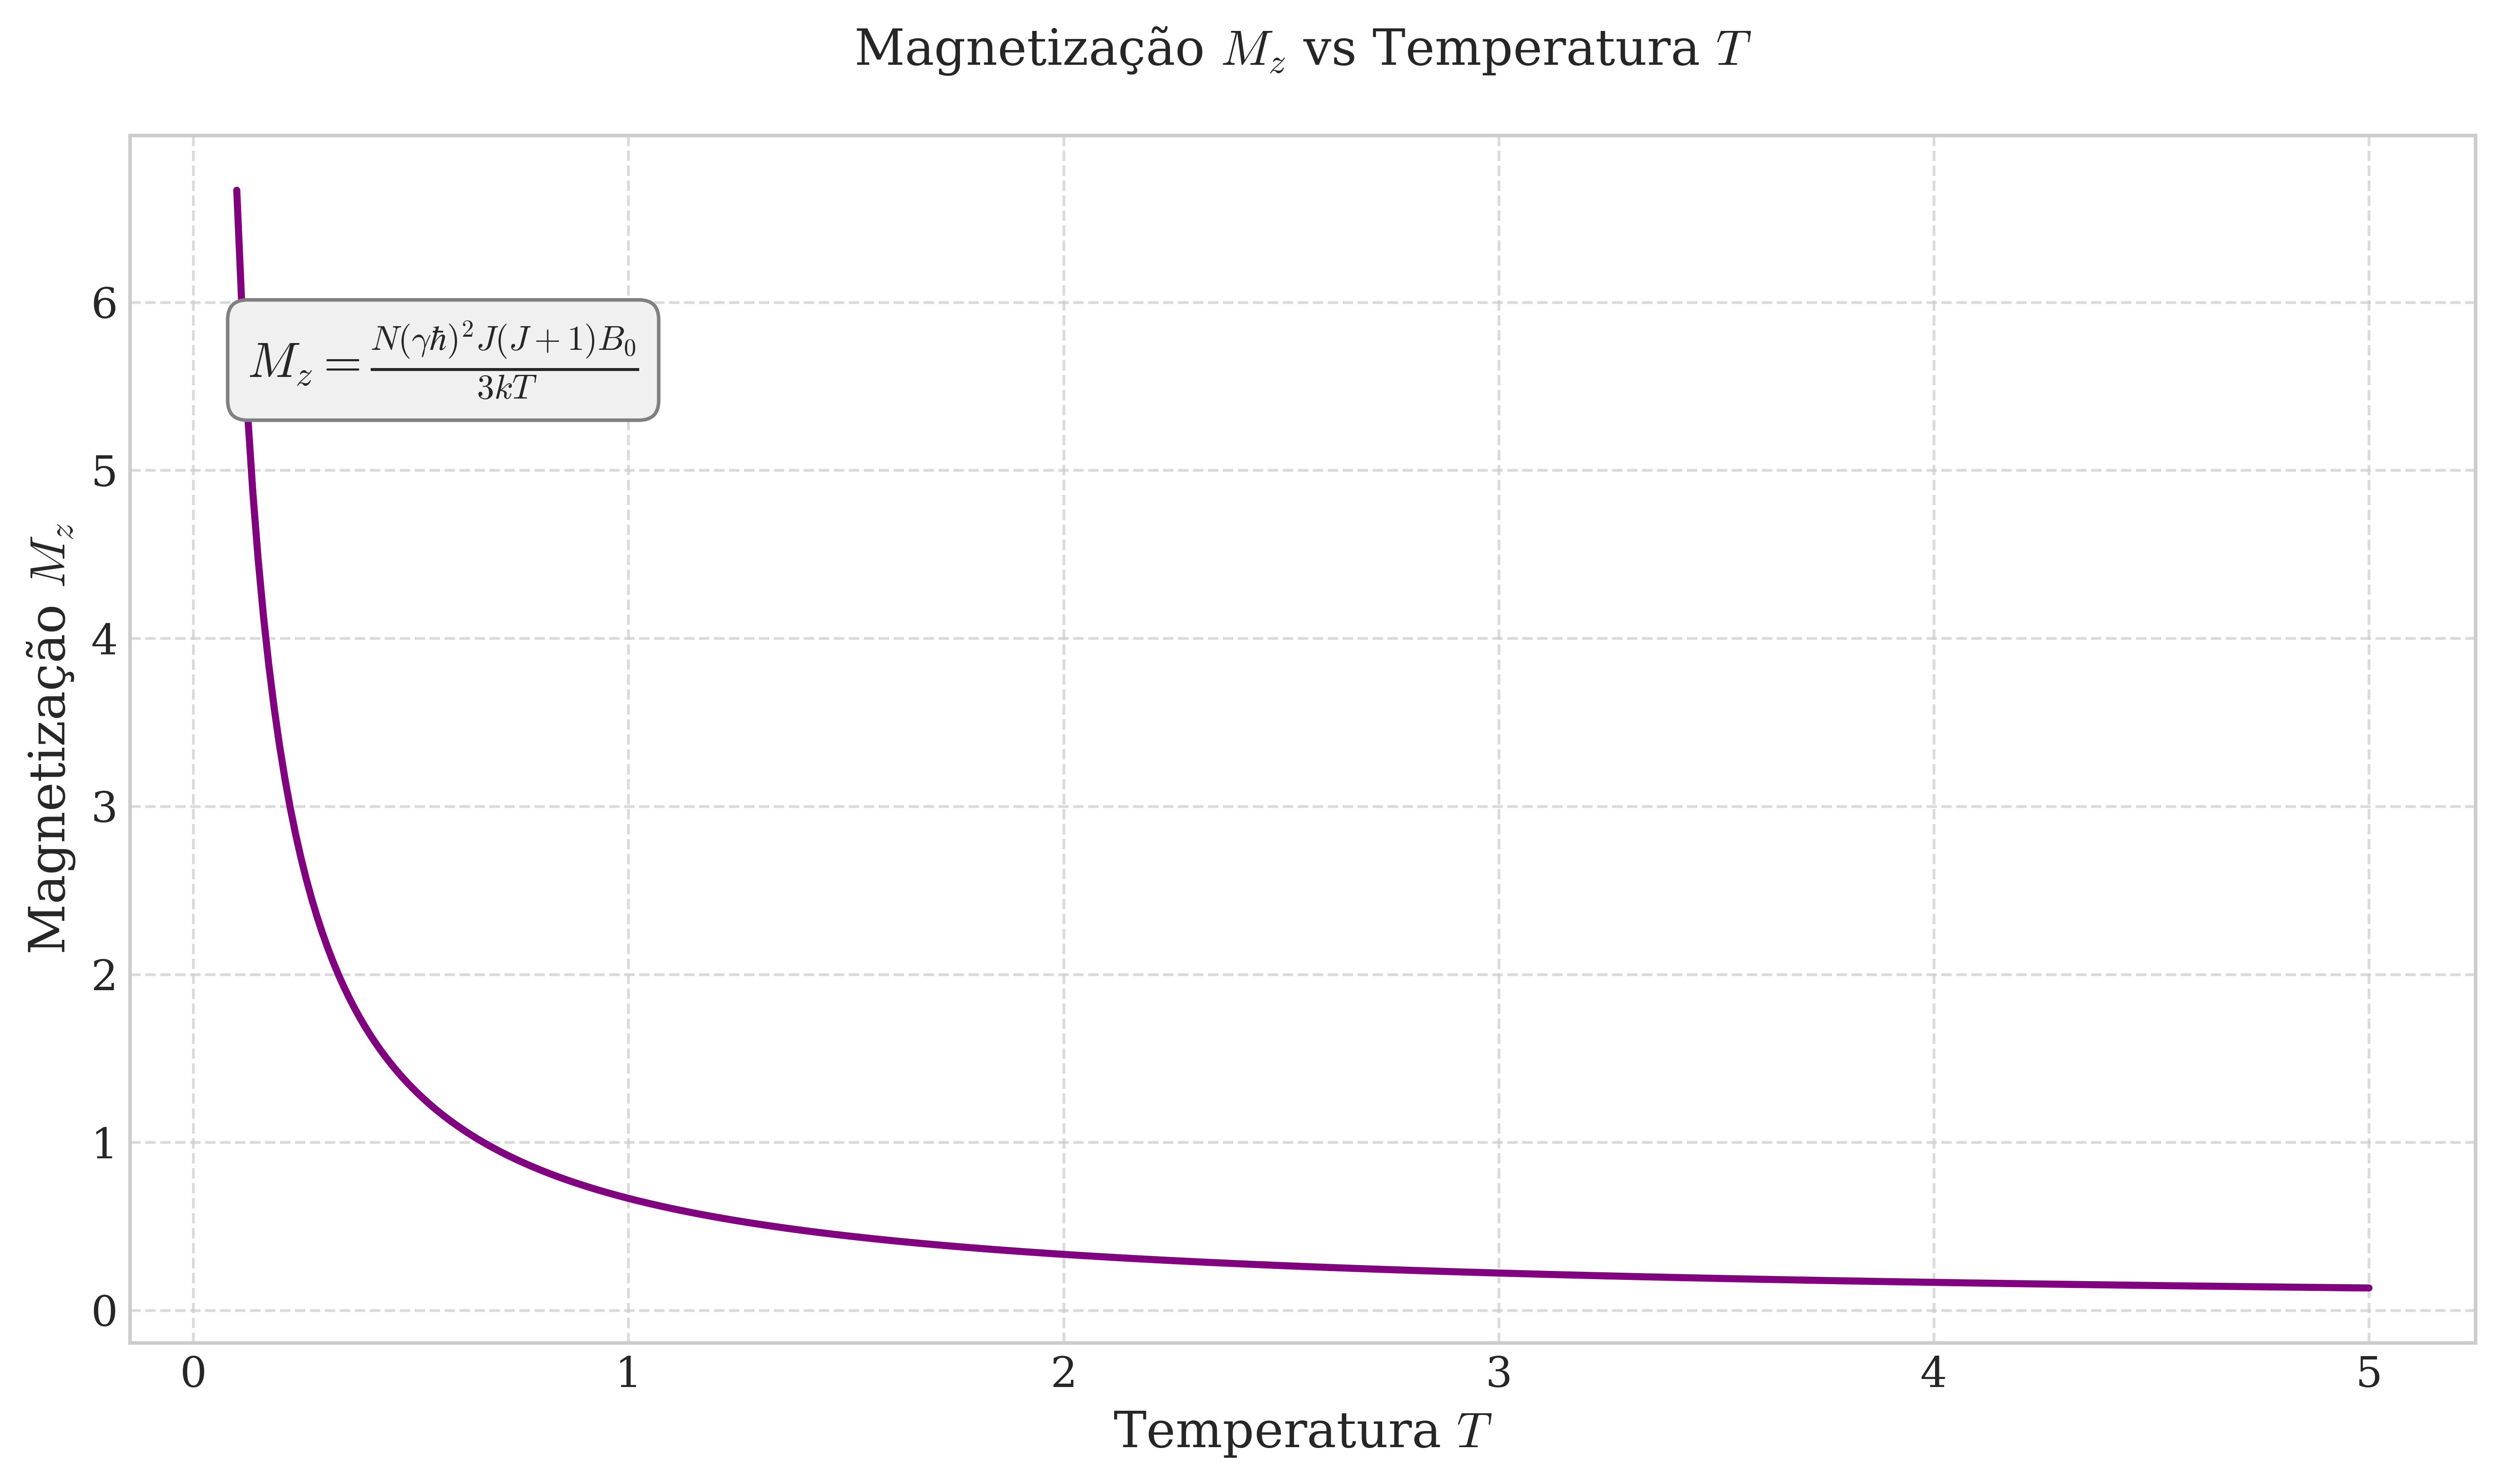

In [ ]:

# Constantes arbitrárias
gamma = 1       # razão giromagnética
hbar = 1        # constante de Planck reduzida
k = 1           # constante de Boltzmann
N = 1           # número de partículas
J = 1           # número quântico do momento angular total
B0 = 1          # campo magnético externo

# Temperatura variando
T_vals = np.linspace(0.1, 5, 400)

# Equação
Mz = (N * (gamma * hbar)**2 * J * (J + 1) * B0) / (3 * k * T_vals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_vals, Mz, color='purple', linewidth=2)
plt.title('Magnetização $M_z$ vs Temperatura $T$', fontsize=14, pad=20)
plt.xlabel('Temperatura $T$')
plt.ylabel('Magnetização $M_z$')

# Anotação com a equação
plt.text(0.05, 0.8,
         r"$M_z = \frac{N (\gamma \hbar)^2 J(J + 1) B_0}{3kT}$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.grid(True)
plt.tight_layout()
plt.show()

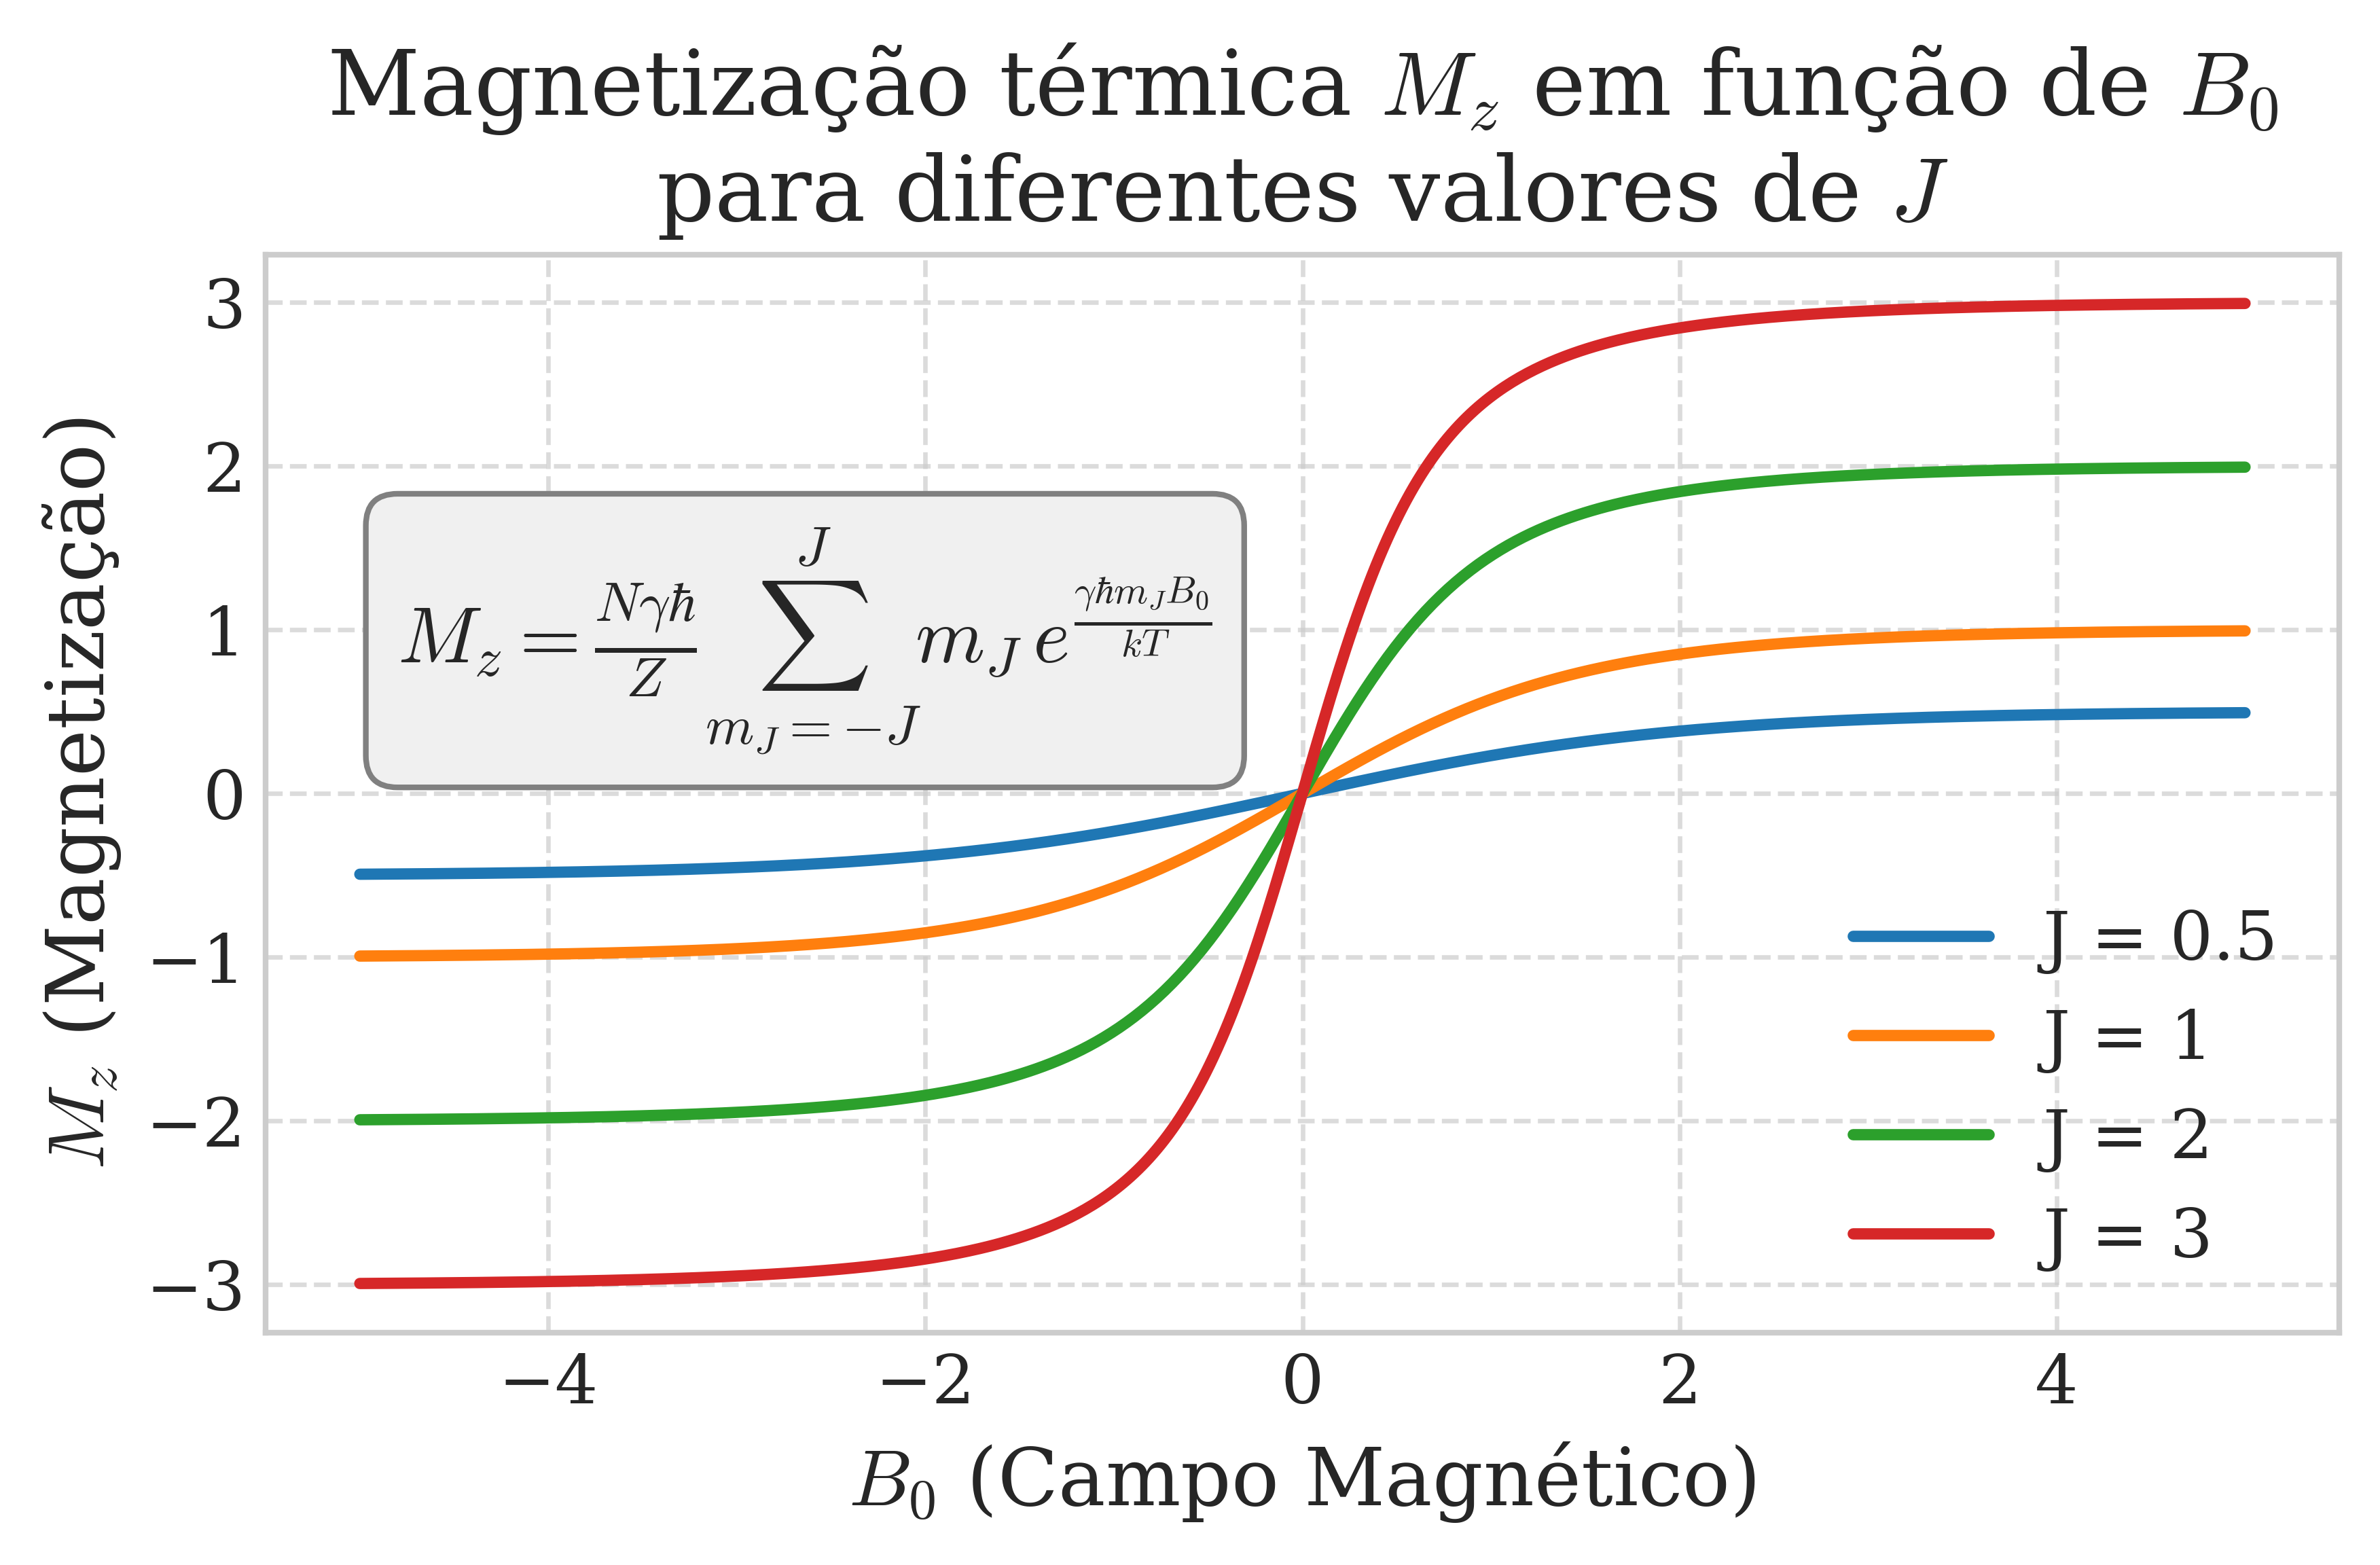

In [ ]:


# Constantes físicas (valores arbitrários para visualização)
gamma = 1  # razão giromagnética
hbar = 1   # constante de Planck reduzida
k = 1      # constante de Boltzmann
N = 1      # número de partículas
T = 1      # temperatura (fixa)

# Campo magnético variando
B0_vals = np.linspace(-5, 5, 500)

# Valores de J a testar
J_vals = [0.5, 1, 2, 3]

for J in J_vals:
    Mz = []
    mJ_vals = np.arange(-J, J + 1, 1)
    for B0 in B0_vals:
        expoentes = np.exp((gamma * hbar * mJ_vals * B0) / (k * T))
        Z = np.sum(expoentes)
        soma = np.sum(mJ_vals * expoentes)
        M = N * gamma * hbar * soma / Z
        Mz.append(M)
    plt.plot(B0_vals, Mz, label=f'J = {J}')

plt.title('Magnetização térmica $M_z$ em função de $B_0$\npara diferentes valores de $J$')
plt.xlabel('$B_0$ (Campo Magnético)')
plt.ylabel('$M_z$ (Magnetização)')
plt.grid(True)
plt.legend()
plt.text(-4.8, 0.8,
         r"$M_z = \frac{N \gamma \hbar}{Z} \sum_{m_J = -J}^{J} m_J \, e^{\frac{\gamma \hbar m_J B_0}{kT}}$",
         fontsize=14, bbox=dict(boxstyle="round,pad=0.4", facecolor="#f0f0f0", edgecolor='gray'))

plt.tight_layout()
plt.show()
